<a href="https://colab.research.google.com/github/Gayatri-Surapaneni/Zomato-restaurant-clustering-and-sentiment-analysis/blob/main/Zomato_restaurant_claustering_and_sentiment_analysis_Gayatri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zomato Restaurant Clustering and Sentiment Analysis**

#**I. Problem statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  t**o analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations**. Also, **cluster the zomato restaurants into different segments**. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

## **Variables Information**

### **1. Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

### **2. Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# **II. Loading the data**

In [1]:
#Loading the necessary libraries 
import numpy as np
import pandas as pd
from numpy import math,unique

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing the dataset

# #Charishma
metadata_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

#wathi
#metadata_df = pd.read_csv('/content/drive/MyDrive/Copy of Zomato Restaurant names and Metadata.csv')
#reviews_df = pd.read_csv('/content/drive/MyDrive/Copy of Zomato Restaurant reviews.csv')

# **III. Insights of data**

## **1. Metadata**

In [4]:
metadata_df.head(5)

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [5]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [6]:
metadata_df.shape

(105, 6)

In [7]:
#Checking the unique values in both dataframes
for i in metadata_df.columns:
  print(i,metadata_df[i].nunique())

Name 105
Links 105
Cost 29
Collections 42
Cuisines 92
Timings 77


## **2. Reviews data** 

In [8]:
reviews_df.head(5)

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [10]:
reviews_df.shape

(10000, 7)

In [11]:
for i in reviews_df.columns:
  print(i,reviews_df[i].nunique())

Restaurant 100
Reviewer 7446
Review 9364
Rating 10
Metadata 2477
Time 9782
Pictures 36


#**IV. Data pre processing**

##**1. Metadata dataframe**


In [12]:
#Here we had cost column with numbers seperated by commas. So we are trying to remove comma which ever is present in Cost column.
#Then we convert Cost column to float
metadata_df['Cost'] = metadata_df['Cost'].str.replace(",","").astype('float64')

In [13]:
#Dropping Links and Timings column as its of not much help.
metadata_df.drop(['Links','Timings'],axis=1,inplace=True)

In [14]:
#Renaming the Name as restuarant as same as Reviews dataframe.
metadata_df.rename(columns={'Name':'Restaurant'},inplace=True)

In [15]:
metadata_df.head(2)

Restaurant   Cost                                        Collections  \
0  Beyond Flavours  800.0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1         Paradise  800.0                                Hyderabad's Hottest   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese

##**2. Reviews dataframe**

In [16]:
#We have only string type present ('Like') in Rating column of reviews_df. So we drop it.
reviews_df = reviews_df[reviews_df['Rating']!='Like']

#We then convert Rating column to float
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')

In [17]:
#Converting Time column to DateTime
import datetime
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])

In [18]:
reviews_df.head(5)

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0

# **V. Missing values**

In [19]:
#Defining a function to display the % of missing values along eith its datatype.
def missing_values_table(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"\n\n")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

##**1. Metadata dataframe**

In [20]:
missing_values_table(metadata_df)


 selected dataframe has 4 columns and 105 




Missing Values  % of Total Values Data Type
Collections              54               51.4    object
Restaurant                0                0.0    object
Cost                      0                0.0   float64
Cuisines                  0                0.0    object

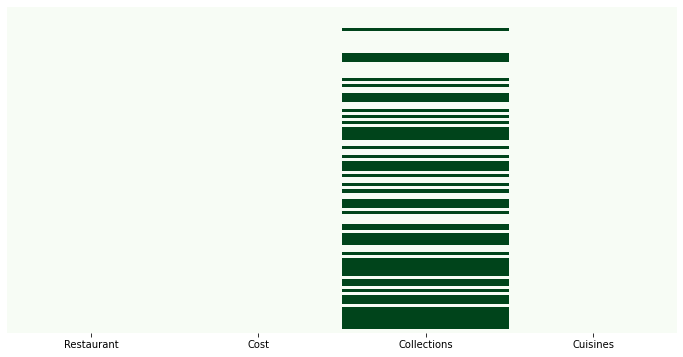

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(metadata_df.isnull(),cbar=False,yticklabels=False,cmap='Greens');

We can observe that only 'Collections' column has missing values (51.4%). Which has to be treated. As the 'Collections' column has informations about the collections of Restuarant, we can keep the missing values in 'Collection' as 'Unknown'.

In [22]:
#Treating null values of Timings and collections
metadata_df['Collections'].fillna('Unknown',inplace=True)


In [23]:
metadata_df.isna().sum()

Restaurant     0
Cost           0
Collections    0
Cuisines       0
dtype: int64

##**2. Reviews dataframe**

In [24]:
missing_values_table(reviews_df)

 selected dataframe has 7 columns and 9999 




Missing Values  % of Total Values       Data Type
Review                  45                0.5          object
Reviewer                38                0.4          object
Rating                  38                0.4         float64
Metadata                38                0.4          object
Time                    38                0.4  datetime64[ns]
Restaurant               0                0.0          object
Pictures                 0                0.0           int64

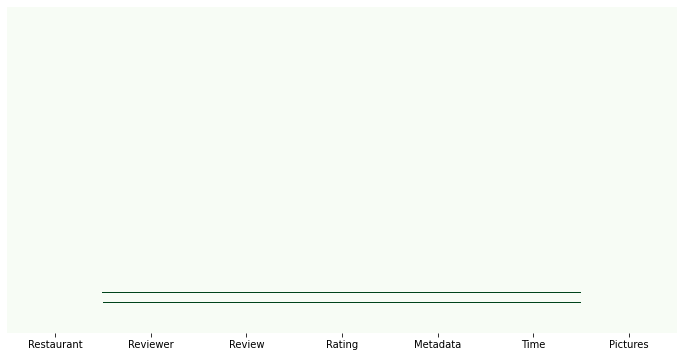

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(reviews_df.isnull(),cbar=False,yticklabels=False,cmap='Greens');

We can see that several rows are entirely empty i.e., it has missing values (<1%) As its less than 1%, we can drop it. 

In [26]:
#Dropping the missing values
reviews_df.dropna(inplace=True)

In [27]:
reviews_df.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

# **VI. Treatment of Outliers**

In [28]:
#defining a function to treaat outliers wrt columns of a dataframe.

#Z score treatment
def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  

##**1. Metadata dataframe**

In [29]:
metadata_df.describe().T

count        mean        std    min    25%    50%     75%     max
Cost  105.0  861.428571  510.14973  150.0  500.0  700.0  1200.0  2800.0

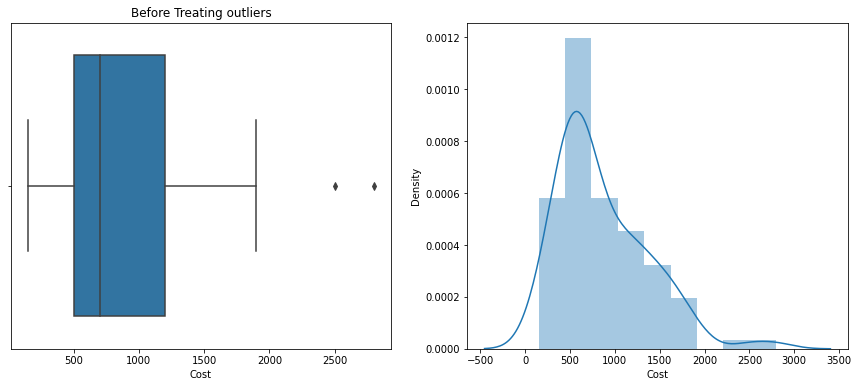

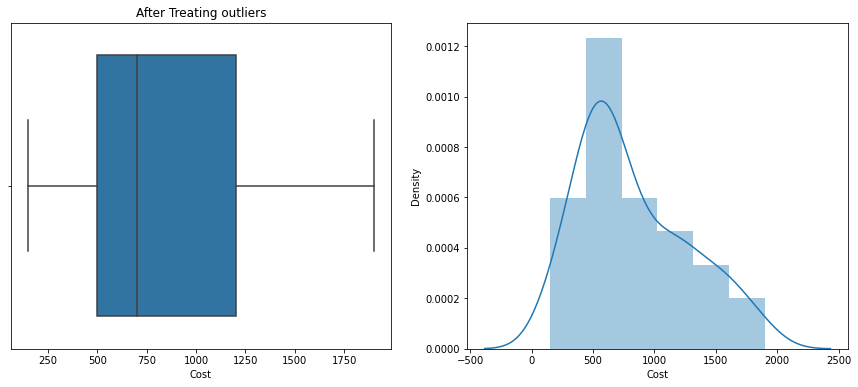

In [30]:
#The only numeric column in this dataframe is 'Cost'. So we do the outlier treatment only for 'Cost'.
#If outliers are present it will treat accordingly to Z-score.
remove_outlier(metadata_df,'Cost')

##**2. Reviews dataframe**

In [31]:
reviews_df.describe().T

count      mean       std  min  25%  50%  75%   max
Rating    9954.0  3.600261  1.483573  1.0  3.0  4.0  5.0   5.0
Pictures  9954.0  0.751959  2.575819  0.0  0.0  0.0  0.0  64.0

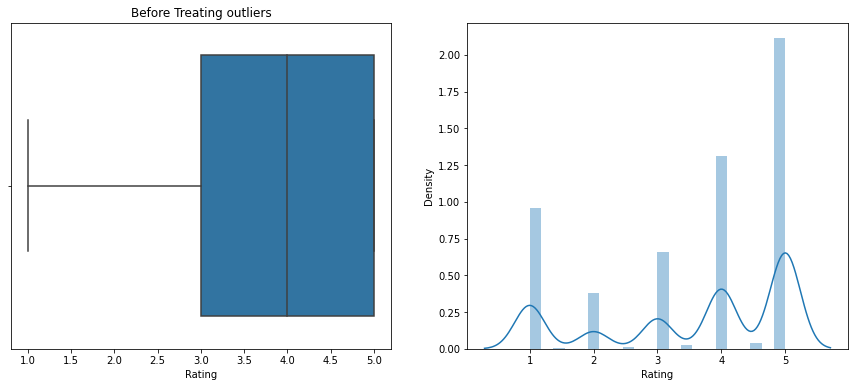

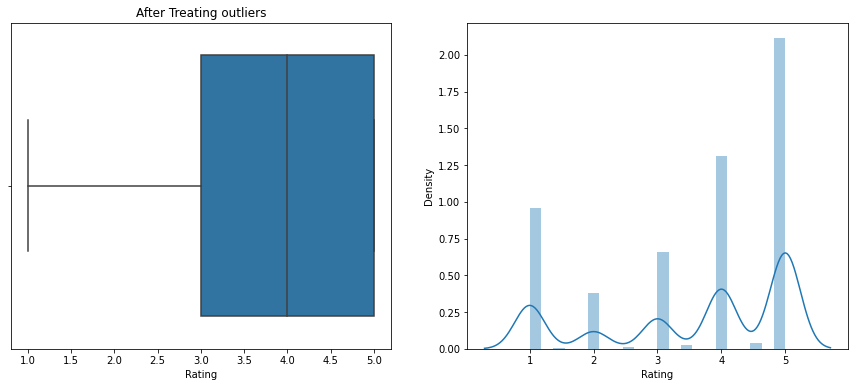

In [32]:
# There are 2 numeric variables present in here. We do the outlier treatment only for those.
remove_outlier(reviews_df,'Rating')

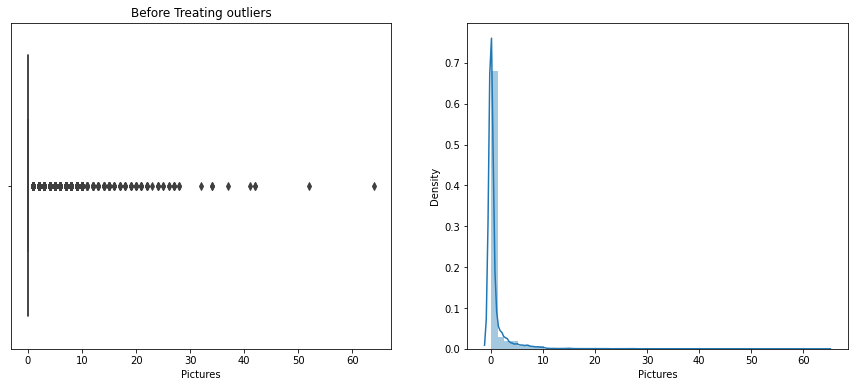

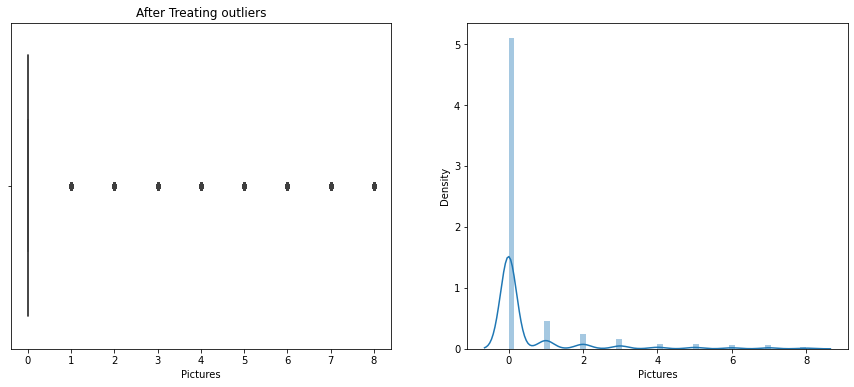

In [33]:
remove_outlier(reviews_df,'Pictures')

#**VII. Data Cleaning**

##**1. Metadata Dataframe**

In [34]:
metadata_df.head(3)

Restaurant    Cost                                        Collections  \
0  Beyond Flavours   800.0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1         Paradise   800.0                                Hyderabad's Hottest   
2         Flechazo  1300.0                 Great Buffets, Hyderabad's Hottest   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts

We have string type varables present in Restuarant, collections and cuisines. So we try using the NLP on the neccessary columns for further analysis.
Restuarant column has the names of all restuarants. So we focus on other 2 columns for further analysis.

###**(a) 'Collections' column** 

####**1. To remove stopwords and punctuation**

In [35]:
# to remove stopwords 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')
# extracting the stopwords from nltk library
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
# Defining a function to remove stopwords and punctuation

#remove stopwards
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

#remove punctuation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [37]:
metadata_df['Collections'] = metadata_df['Collections'].apply(remove_punctuation)

In [38]:
metadata_df['Collections'] = metadata_df['Collections'].apply(stopwords)

####**2. Count vectorizer**

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(metadata_df['Collections']) 
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [40]:
#list to store vocab and count
vocab = []
count = []
#iterate through each vocab and count append the value to designated list
for key, value in dictionary:
  vocab.append(key)
  count.append(value)
#store the count in pandas dataframe with vocab as index
vocab_bef_stem = pd.Series(count,  index = vocab)
#store the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending = False)  

####**3. Stemming**

In [41]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [42]:
metadata_df['Collections'] = metadata_df['Collections'].apply(stemming)


####**4. tfid vectorizer**

In [43]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(metadata_df['Collections'])   

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [44]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)

#### **5. Creating count of all words in collections as 'collections length'**

In [45]:
def length(text):   
  count = 0
  for i in range(len(text)):
    if text[i]==' ':
        count = count + 1
        
  return count+1

In [46]:
metadata_df['Collections_length'] = metadata_df['Collections'].apply(length)


In [47]:
metadata_df.head()

Restaurant    Cost  \
0                 Beyond Flavours   800.0   
1                        Paradise   800.0   
2                        Flechazo  1300.0   
3  Shah Ghouse Hotel & Restaurant   800.0   
4      Over The Moon Brew Company  1200.0   

                                         Collections  \
0  food hygien rate restaur hyderabad corpor favo...   
1                                  hyderabad hottest   
2                     great buffet hyderabad hottest   
3                                 late night restaur   
4  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  Collections_length  
0  Chinese, Continental, Kebab, European, South I...                  15  
1                     Biryani, North Indian, Chinese                   2  
2       Asian, Mediterranean, North Indian, Desserts                   4  
3  Biryani, North Indian, Chinese, Seafood, Bever...                   3  
4  Asian, Continental, North Indian, Chinese, Med...                  13

###**(b) 'Cuisines' column**

In [48]:
#Cuisines has items of resturant which are seperated by comma. So there is nothing to clean in Cuisines. 
#So we consider the count of cuisines list
list_of_cuisins = metadata_df.Cuisines.str.split(', ')

metadata_df['Cuisines_list'] = pd.Series()

for i in range(len(metadata_df)):
  metadata_df['Cuisines_list'][i] = list_of_cuisins[i]


In [49]:
#creating a new column for the total number of cusines served by restaurants
metadata_df['Total Cuisines'] = metadata_df['Cuisines_list'].apply(lambda x : len(x))
metadata_df.drop(['Cuisines_list'],axis=1,inplace=True)

In [50]:
metadata_df.head(3)

Restaurant    Cost                                        Collections  \
0  Beyond Flavours   800.0  food hygien rate restaur hyderabad corpor favo...   
1         Paradise   800.0                                  hyderabad hottest   
2         Flechazo  1300.0                     great buffet hyderabad hottest   

                                            Cuisines  Collections_length  \
0  Chinese, Continental, Kebab, European, South I...                  15   
1                     Biryani, North Indian, Chinese                   2   
2       Asian, Mediterranean, North Indian, Desserts                   4   

   Total Cuisines  
0               6  
1               3  
2               4

##**2. Reviews dataframe**

In [51]:
# the meta data column will be divided into 2 new columns since there are 2 types of info available
reviews_df['no_of_Reviews'],reviews_df['no_of_Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['no_of_Reviews'] = pd.to_numeric(reviews_df['no_of_Reviews'].str.split(' ').str[0])
reviews_df['no_of_Followers'] = pd.to_numeric(reviews_df['no_of_Followers'].str.split(' ').str[1])

In [52]:
# Converting newly created columns to float
reviews_df['no_of_Reviews'] = reviews_df['no_of_Reviews'].astype('float64')
reviews_df['no_of_Followers'] = reviews_df['no_of_Followers'].astype('float64')

In [53]:
# extracting the date and hour from the 'Time' column
reviews_df['Date'] = pd.DatetimeIndex(reviews_df['Time']).date
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [54]:
#finding out the respected day,month and year
reviews_df['day'] = reviews_df['Date'].apply(lambda x: x.weekday())
reviews_df['month']=reviews_df['Date'].apply(lambda x: x.month)
reviews_df['year'] = reviews_df['Date'].apply(lambda x: x.year)


In [55]:
#Records of days and months were interms of numbers, so converting that to string type.

#weekdays
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
reviews_df['day']=reviews_df['day'].map(week_day)
#months
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
reviews_df['month']=reviews_df['month'].map(month_dict)


In [56]:
#Dropping the metadata and time
reviews_df = reviews_df.drop(['Metadata'], axis =1)
reviews_df = reviews_df.drop(['Time'], axis =1)

# **VIII. EDA**

##**1. Metadata Dataframe**

In [57]:
metadata_df.head(5)

Restaurant    Cost  \
0                 Beyond Flavours   800.0   
1                        Paradise   800.0   
2                        Flechazo  1300.0   
3  Shah Ghouse Hotel & Restaurant   800.0   
4      Over The Moon Brew Company  1200.0   

                                         Collections  \
0  food hygien rate restaur hyderabad corpor favo...   
1                                  hyderabad hottest   
2                     great buffet hyderabad hottest   
3                                 late night restaur   
4  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  Collections_length  \
0  Chinese, Continental, Kebab, European, South I...                  15   
1                     Biryani, North Indian, Chinese                   2   
2       Asian, Mediterranean, North Indian, Desserts                   4   
3  Biryani, North Indian, Chinese, Seafood, Bever...                   3   
4  Asian, Continental, North Indian, Chinese, Med...                  13   

   Total Cuisines  
0               6  
1               3  
2               4  
3               5  
4               5

###**(i) Count of cuisines offered by restaurants**

In [58]:
list_of_cuisins = metadata_df.Cuisines.str.split(', ')

diff_cuisines = {} 
for names in list_of_cuisins: 
    for name in names:
        if (name in diff_cuisines):
            diff_cuisines[name]+=1
        else:  
            diff_cuisines[name]=1 
cuisines_df = pd.DataFrame(diff_cuisines.values(), diff_cuisines.keys(),columns = {'cuisines_counts'}).reset_index()
cuisines_df.sort_values(by = 'cuisines_counts',ascending = False,inplace = True) 
cuisines_df.rename(columns={'index':'cuisines_name', 'cuisines_name':'cuisines_counts'},inplace=True)
cuisines_df.head(10)

cuisines_name  cuisines_counts
5   North Indian               61
0        Chinese               43
1    Continental               21
6        Biryani               16
18     Fast Food               15
7          Asian               15
20       Italian               14
9       Desserts               13
4   South Indian                9
29        Bakery                7

In [59]:
#diff_cuisines

Text(0, 0.5, 'count of cuisines  in  all restaurants')

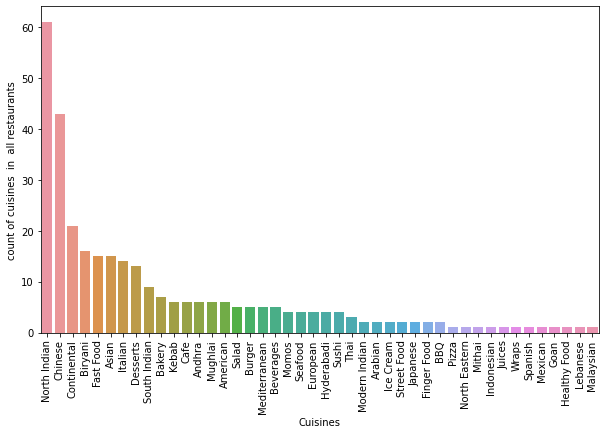

In [60]:
fig = plt.figure(figsize=[10,6])
sns.barplot(data=cuisines_df, x='cuisines_name', y= 'cuisines_counts')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('count of cuisines  in  all restaurants')


We cna observe that **'North indian'** is the **Popular Cuisine** which is offered by almost many resturants. And **'Malaysian'** is the **rare cuisine**. 

###**(ii). Count of Collections offered by restaurants**

In [61]:
list_of_collection = metadata_df.Collections.str.split(', ')
diff_coll = {} 
for names in list_of_collection: 
    for name in names:
        if (name in diff_coll):
            diff_coll[name]+=1
        else:  
            diff_coll[name]=1 
collections_df = pd.DataFrame(diff_coll.values(), diff_coll.keys(),columns = {'collection_counts'}).reset_index()
collections_df.sort_values(by = 'collection_counts',ascending = False,inplace = True) 
collections_df.rename(columns={'index':'collection_name', 'collection_name':'collection_counts'},inplace=True)
collections_df.head(10)
# since collections column has 51% null values.. we can drop it

collection_name  collection_counts
7                                             unknown                 54
6                  food hygien rate restaur hyderabad                  4
12                                       great buffet                  2
40                                           new gold                  2
1                                   hyderabad hottest                  2
28                                  panasian delicaci                  2
16                                       veggi friend                  2
15                                         trend week                  2
32  sunday brunch great breakfast function venu ra...                  1
27                       function venu region favorit                  1

Text(0, 0.5, 'count of collections')

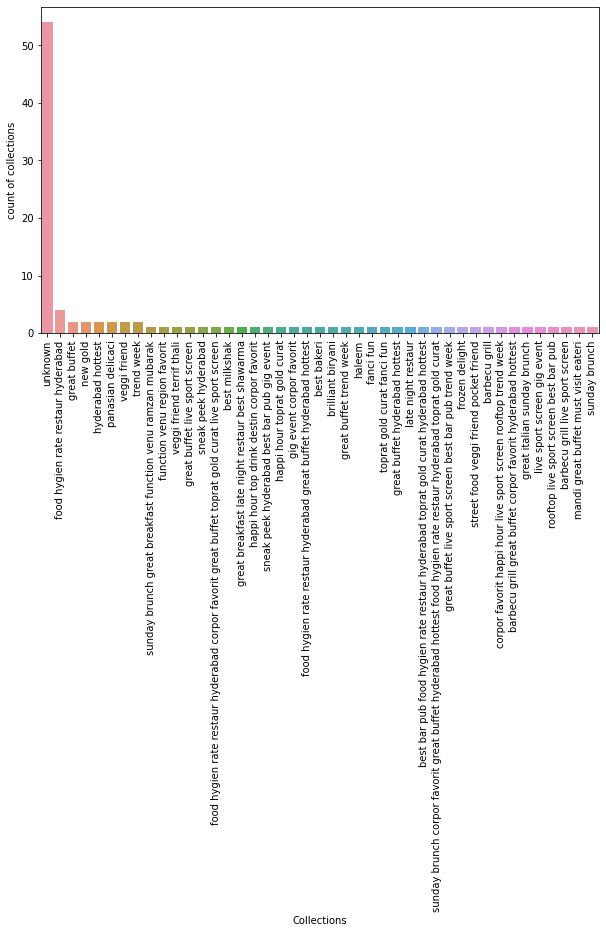

In [62]:
fig = plt.figure(figsize=[10,6])
sns.barplot(data=collections_df, x='collection_name', y= 'collection_counts')
plt.xlabel('Collections')
plt.xticks(rotation=90)
plt.ylabel('count of collections')

Collections are like a tagline whcih can be given to particular resturants. So we can get to know that the most used tagline for resturants are **' Hygine food'** followed by 'Unkown'.

###**(iii). Total number of collections and cuisines wrt cost offered by each restaurant**

In [63]:
report = metadata_df.copy()

In [64]:
#taking only numeric columns to do the minmaxscaling
report_numeric = metadata_df[['Collections_length','Total Cuisines','Cost']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(report_numeric)
#print(scaled)
report['collection_length_scaled'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
report['cuisines_scaled'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
report['cost_scaled'] = pd.Series(scaled[i][2] for i in range(len(scaled)))
#occupation_report = occupation_report.loc[1:21,:]

Text(0.5, 1.0, 'Restaurant sorted with number of cuisines wrt cost')

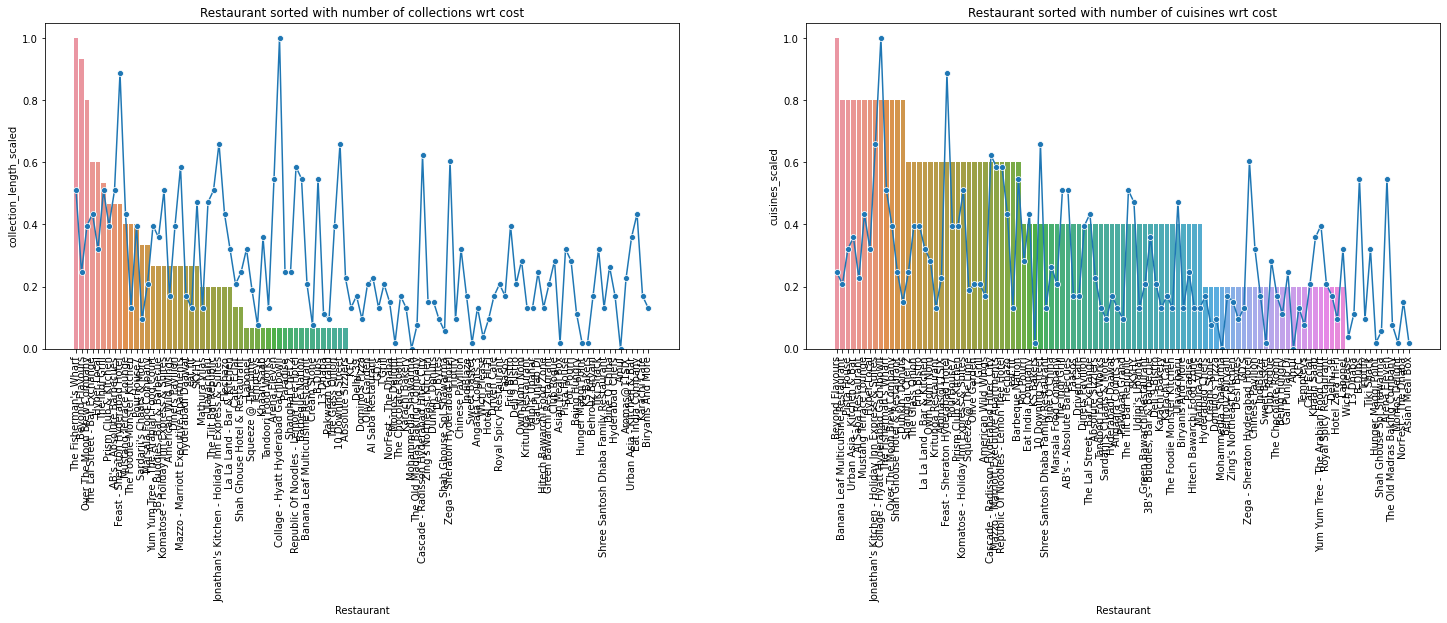

In [65]:
collection_df = report.sort_values(['Collections_length'],ascending=False)
cuisines_df = report.sort_values(['Total Cuisines'],ascending=False)

plt.figure(figsize=(25,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='collection_length_scaled',data = collection_df)
sns.lineplot(x='Restaurant',y='cost_scaled',data= collection_df,marker='o')
plt.title('Restaurant sorted with number of collections wrt cost')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='cuisines_scaled',data = cuisines_df )
sns.lineplot(x='Restaurant',y='cost_scaled',data= cuisines_df,marker='o')
plt.title('Restaurant sorted with number of cuisines wrt cost')
#speaker_report



Here the line graph represents the cost. And collections count are represnted by colored bar graphs. We can see that they are not at all related.

The left graph is sorted wrt 'Collections count'.

The right graph is sorted wrt 'Cost'.

###**(iv). Average Cost of each restaurant**

In [66]:
cost_at_restaurants = metadata_df.groupby(['Restaurant'])['Cost'].mean().sort_values(ascending=False).reset_index()
cost_at_restaurants.sort_values(by = 'Cost',ascending = False,inplace = True)

cost_at_restaurants.head(10)

Restaurant    Cost
0               Collage - Hyatt Hyderabad Gachibowli  2800.0
1                   Feast - Sheraton Hyderabad Hotel  2500.0
2                                  10 Downing Street  1900.0
3  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
4            Cascade - Radisson Hyderabad Hitec City  1800.0
5                    Zega - Sheraton Hyderabad Hotel  1750.0
6             Republic Of Noodles - Lemon Tree Hotel  1700.0
7              Mazzo - Marriott Executive Apartments  1700.0
8                                    Barbeque Nation  1600.0
9                                       Arena Eleven  1600.0

Text(0, 0.5, 'Cost')

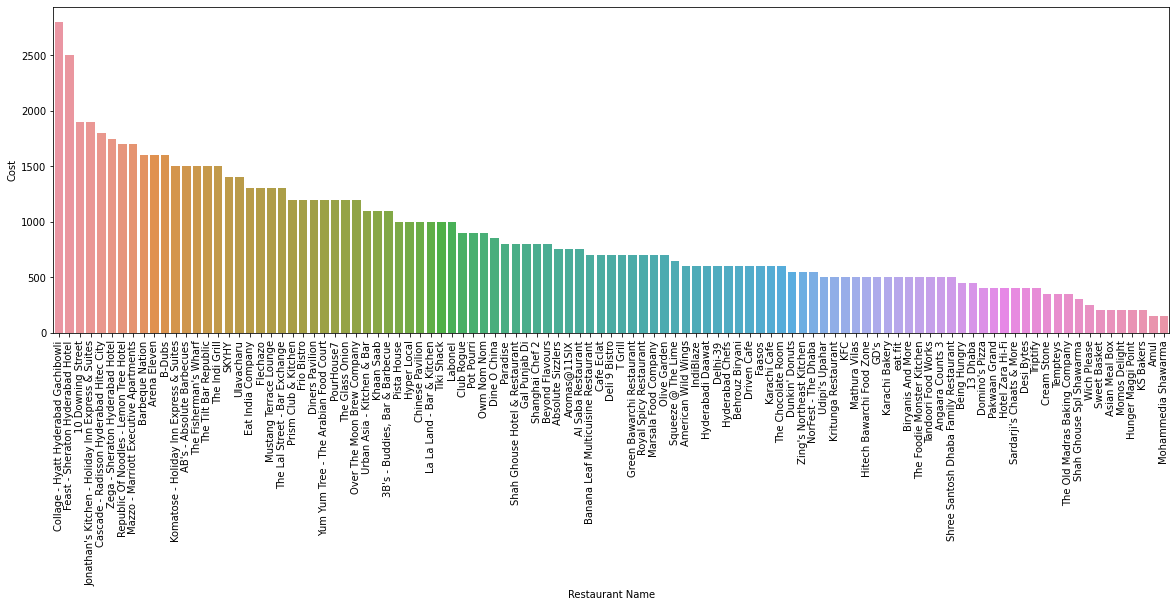

In [67]:
fig = plt.figure(figsize=[20,6])
sns.barplot(data=cost_at_restaurants, x='Restaurant', y= 'Cost')
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90)
plt.ylabel('Cost')


Above graph represents the graph wrt the average cost of all resturants in sorted manner.

###**(v). Best Restaurant with ratings and price**

In [68]:
top_restaurants_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()

restaurants_price_rating = top_restaurants_rating.merge(cost_at_restaurants,on='Restaurant',how='inner')

In [69]:
restaurants_price_rating.head(2)

Restaurant  Rating    Cost
0  AB's - Absolute Barbecues    4.88  1500.0
1                     B-Dubs    4.81  1600.0

In [70]:
#taking only numeric columns to do the minmaxscaling
report_numeric = restaurants_price_rating[['Rating','Cost']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(report_numeric)
#print(scaled)
restaurants_price_rating['Rating_scaled'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
restaurants_price_rating['Cost_scaled'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
#occupation_report = occupation_report.loc[1:21,:]

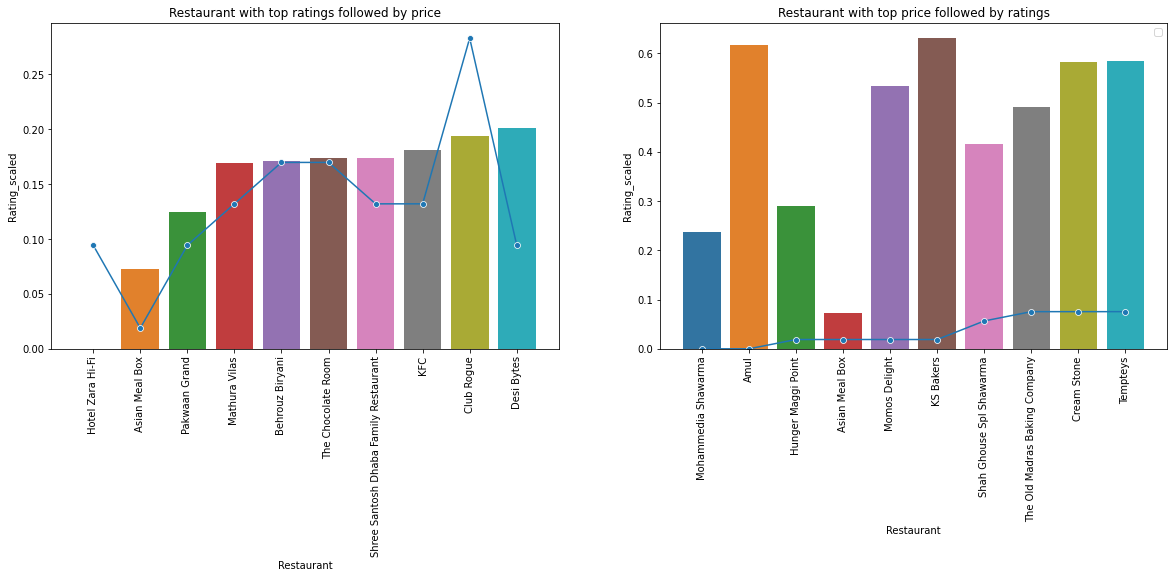

In [71]:
report_1 = restaurants_price_rating.sort_values('Rating').head(10)
report_2 = restaurants_price_rating.sort_values('Cost').head(10)

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Rating_scaled',data = report_1 )
sns.lineplot(x='Restaurant',y='Cost_scaled',data= report_1,marker='o')
plt.title('Restaurant with top ratings followed by price')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Rating_scaled',data = report_2 )
sns.lineplot(x='Restaurant',y='Cost_scaled',data= report_2,marker='o')
plt.title('Restaurant with top price followed by ratings')
plt.legend()
#speaker_report


Above graphs gives an idea about the best restuarants which has high rating along with the cost.The line chart represents the average price.

Left graph is sorted wrt price.

Right graph is sorted wrt average rating.

We can conclude that there exits some resdtuarants, even y having the more rating, the price is reasonable.

##**2. Reviews dataframe**

In [72]:
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  Pictures  \
0  The ambience was good, food was quite good . h...     5.0         0   
1  Ambience is too good for a pleasant evening. S...     5.0         0   
2  A must try.. great food great ambience. Thnx f...     5.0         0   
3  Soumen das and Arun was a great guy. Only beca...     5.0         0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0         0   

   no_of_Reviews  no_of_Followers        Date  Hour       day month  year  
0            1.0              2.0  2019-05-25    15  Saturday   May  2019  
1            3.0              2.0  2019-05-25    14  Saturday   May  2019  
2            2.0              3.0  2019-05-24    22    Friday   May  2019  
3            1.0              1.0  2019-05-24    22    Friday   May  2019  
4            3.0              2.0  2019-05-24    21    Friday   May  2019

###**(i). Restaurants available wrt different Ratings**

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64


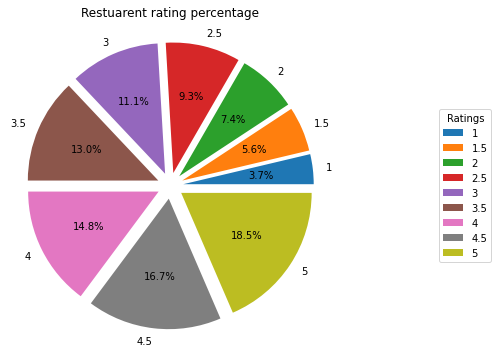

In [73]:
# Rating column visuaalization
print(reviews_df.Rating.value_counts())

y = np.unique(reviews_df['Rating'])
mylabels = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

plt.figure(figsize=(10,6))
plt.pie(y, labels = mylabels, autopct = '%1.1f%%', explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.legend(title = 'Ratings',bbox_to_anchor = (1.5,0.5), loc = "right")
plt.title("Restuarent rating percentage")
plt.show()


We can see that majority of the restuarants has >3 rating. 

###**(ii). Average Ratings of the Top 10 restaurants**

In [74]:
top_restaurants_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
top_restaurants_rating

Restaurant  Rating
0        AB's - Absolute Barbecues   4.880
1                           B-Dubs   4.810
2   3B's - Buddies, Bar & Barbecue   4.760
3                         Paradise   4.700
4                         Flechazo   4.660
..                             ...     ...
95                 Behrouz Biryani   2.825
96                   Mathura Vilas   2.820
97                   Pakwaan Grand   2.710
98                  Asian Meal Box   2.580
99                Hotel Zara Hi-Fi   2.400

[100 rows x 2 columns]

Text(0.5, 1.0, 'Top 15 Restaurants')

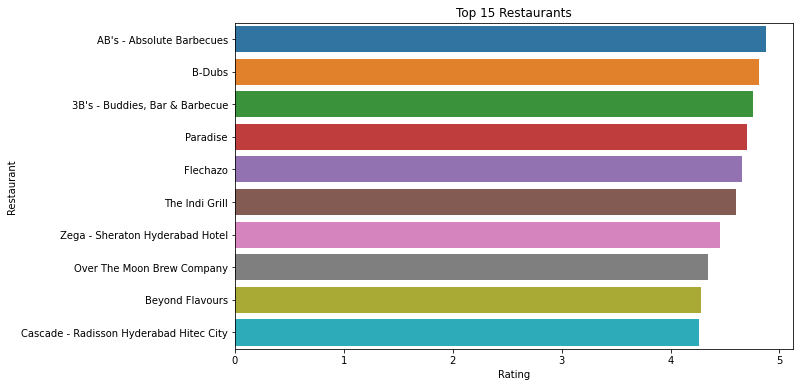

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(data= top_restaurants_rating.head(10), x='Rating', y='Restaurant')
plt.title('Top 15 Restaurants')

These are the top 15 resturants with very good rating (>3)

###**(iii). Restaurant with the view of Followers and Reviews**

In [76]:
followers_reviews_report = reviews_df.groupby(['Restaurant'])['no_of_Followers'].sum().reset_index()
Total_reviews = reviews_df.groupby(['Restaurant'])['no_of_Reviews'].sum().reset_index()

In [77]:
followers_reviews_report = followers_reviews_report.merge(Total_reviews,on='Restaurant',how='left')

In [78]:
#taking only numeric columns to do the minmaxscaling
report_numeric = followers_reviews_report[['no_of_Reviews','no_of_Followers']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(report_numeric)
#print(scaled)
followers_reviews_report['Number_of_Followers_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
followers_reviews_report['Number_of_Reviews_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
#occupation_report = occupation_report.loc[1:21,:]

Text(0.5, 1.0, 'Restaurant sorted with top Reviews followed by Followers')

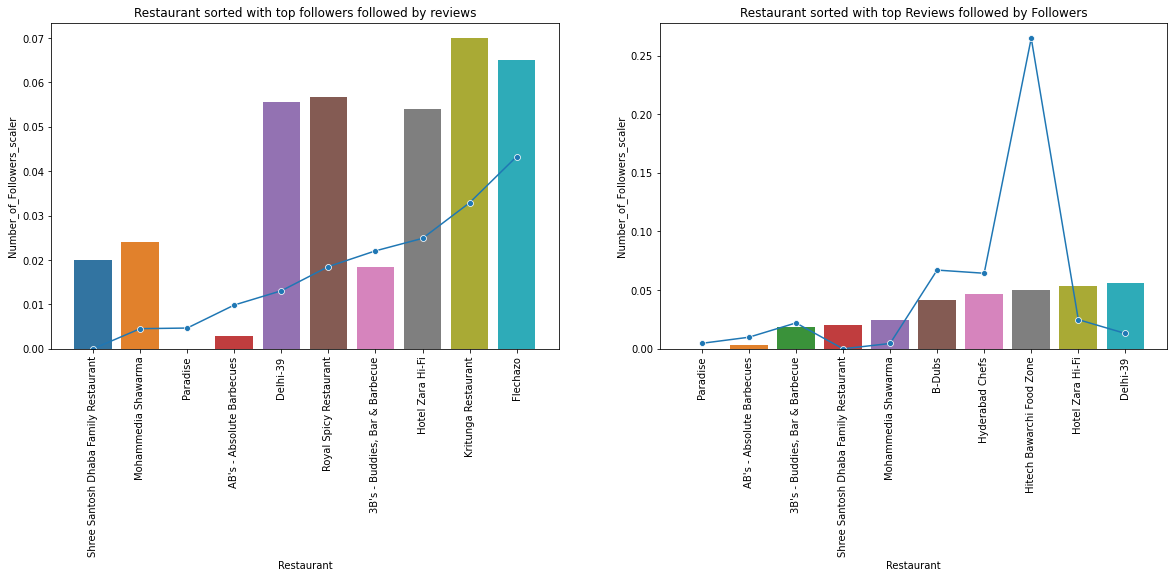

In [79]:
report_1 = followers_reviews_report.sort_values('no_of_Followers').head(10)
report_2 = followers_reviews_report.sort_values('no_of_Reviews').head(10)

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Number_of_Followers_scaler',data = report_1 )
sns.lineplot(x='Restaurant',y='Number_of_Reviews_scaler',data= report_1,marker='o')
plt.title('Restaurant sorted with top followers followed by reviews')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Number_of_Followers_scaler',data = report_2 )
sns.lineplot(x='Restaurant',y='Number_of_Reviews_scaler',data= report_2,marker='o')
plt.title('Restaurant sorted with top Reviews followed by Followers')
#speaker_report


This graph is drawn to get an idea about the number of followers and number of reviews for each resturants. The line graph represents the number of reviews and colored bar graph represents the the number of followers.

Left graph is sorted wrt followers.

Right graph is sorted wrt reviews.

### **(iv). Good , Bad and Average restuarant's Reviews**

In [80]:
reviews_eda = reviews_df.copy()

In [81]:
#createing new rating column categorised into 3 types i.e. good, bad and average
def sentiment_rating(rating):
  # Replacing ratings of 1,2,3 with 0 (not good) and 4,5 with 1 (good) and 2.5, 3, 3.5 with 0.5 (average)
  if(rating == 1 or rating == 1.5 or rating == 2):
    bad = 0
    return bad
  elif(rating == 2.5 or rating == 3 or rating == 3.5):
    average = 0.5
    return average
  elif(rating == 4 or rating == 4.5 or rating == 5):
    good = 1
    return good

#applying above function
reviews_eda["rating_classification"] = reviews_eda["Rating"].apply(sentiment_rating)


In [82]:
#Classifying the reviews as good, bad and average
good = reviews_eda.loc[reviews_eda['rating_classification']==1,'Review']
bad = reviews_eda.loc[reviews_eda['rating_classification']==1,'Review']
average = reviews_eda.loc[reviews_eda['rating_classification']==1,'Review']

In [83]:
from wordcloud import WordCloud
text1 = " ".join(good)
text2 = " ".join(bad)
text3 = " ".join(average)
word_cloud1 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'white').generate(text1)
word_cloud2 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'black').generate(text2)
word_cloud3 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'red').generate(text3)

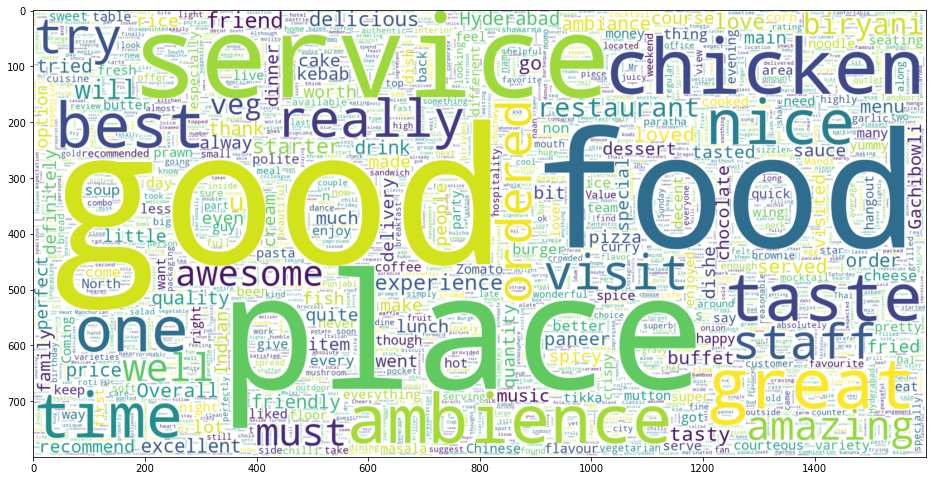

In [84]:
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud1,interpolation = 'bilinear')

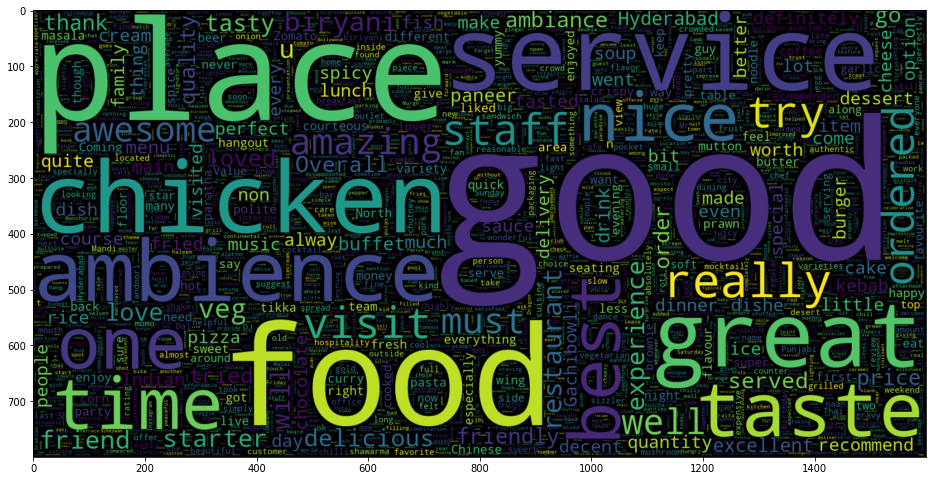

In [85]:
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud2,interpolation = 'bilinear')

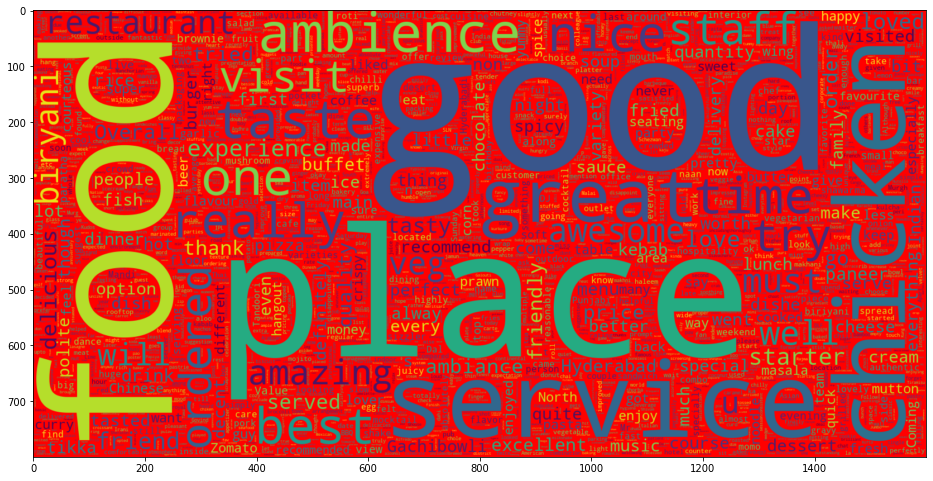

In [86]:
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud3,interpolation = 'bilinear')

#**IX. Feature Engineering**

## **1. Feature creation**

In [87]:
metadata_df.head(2)

Restaurant   Cost                                        Collections  \
0  Beyond Flavours  800.0  food hygien rate restaur hyderabad corpor favo...   
1         Paradise  800.0                                  hyderabad hottest   

                                            Cuisines  Collections_length  \
0  Chinese, Continental, Kebab, European, South I...                  15   
1                     Biryani, North Indian, Chinese                   2   

   Total Cuisines  
0               6  
1               3

In [88]:
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  Pictures  \
0  The ambience was good, food was quite good . h...     5.0         0   
1  Ambience is too good for a pleasant evening. S...     5.0         0   
2  A must try.. great food great ambience. Thnx f...     5.0         0   
3  Soumen das and Arun was a great guy. Only beca...     5.0         0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0         0   

   no_of_Reviews  no_of_Followers        Date  Hour       day month  year  
0            1.0              2.0  2019-05-25    15  Saturday   May  2019  
1            3.0              2.0  2019-05-25    14  Saturday   May  2019  
2            2.0              3.0  2019-05-24    22    Friday   May  2019  
3            1.0              1.0  2019-05-24    22    Friday   May  2019  
4            3.0              2.0  2019-05-24    21    Friday   May  2019

We have two dataframes here. One for clustering and other for sentiment analysis. For the clustering, we try to consider the metadata dataframe along with we try to extract some usefull informtion of the resturants like 'Rating', 'Number of followers' and 'Number of Reviews' from the other  reviews dataframe.

#### **(a) Extracting 'rating'**

In [89]:
top_restaurants_rating.rename(columns={'Name':'Restaurant'},inplace=True)

In [90]:
top_restaurants_rating.head(2)

Restaurant  Rating
0  AB's - Absolute Barbecues    4.88
1                     B-Dubs    4.81

In [91]:
DF_meta = metadata_df.merge(top_restaurants_rating,on='Restaurant',how='left')
DF_meta.rename(columns={'Rating':'Avg Rating'},inplace=True)
DF_meta.head(3)

Restaurant    Cost                                        Collections  \
0  Beyond Flavours   800.0  food hygien rate restaur hyderabad corpor favo...   
1         Paradise   800.0                                  hyderabad hottest   
2         Flechazo  1300.0                     great buffet hyderabad hottest   

                                            Cuisines  Collections_length  \
0  Chinese, Continental, Kebab, European, South I...                  15   
1                     Biryani, North Indian, Chinese                   2   
2       Asian, Mediterranean, North Indian, Desserts                   4   

   Total Cuisines  Avg Rating  
0               6        4.28  
1               3        4.70  
2               4        4.66

#### **(b) Extracting 'number of reviews' and 'number of followers'**

In [92]:
Total_followers = pd.DataFrame(reviews_df.groupby(['Restaurant'])['no_of_Followers'].sum().reset_index())
Total_reviews = pd.DataFrame(reviews_df.groupby(['Restaurant'])['no_of_Reviews'].sum().reset_index())

In [93]:
DF_meta = DF_meta.merge(Total_reviews,on='Restaurant',how='left')
DF_meta = DF_meta.merge(Total_followers,on='Restaurant',how='left')

In [94]:
DF_meta.head(3)

Restaurant    Cost                                        Collections  \
0  Beyond Flavours   800.0  food hygien rate restaur hyderabad corpor favo...   
1         Paradise   800.0                                  hyderabad hottest   
2         Flechazo  1300.0                     great buffet hyderabad hottest   

                                            Cuisines  Collections_length  \
0  Chinese, Continental, Kebab, European, South I...                  15   
1                     Biryani, North Indian, Chinese                   2   
2       Asian, Mediterranean, North Indian, Desserts                   4   

   Total Cuisines  Avg Rating  no_of_Reviews  no_of_Followers  
0               6        4.28          752.0          10061.0  
1               3        4.70          252.0            798.0  
2               4        4.66          667.0           2748.0

We now consider the two dataframes from here as one which contains only string variables and other with numeric variables.

#### **(c) Dataframe with string variables**

In [95]:
text_DF = DF_meta[['Restaurant','Collections','Cuisines']]

In [96]:
text_DF.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                         Collections  \
0  food hygien rate restaur hyderabad corpor favo...   
1                                  hyderabad hottest   
2                     great buffet hyderabad hottest   
3                                 late night restaur   
4  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts  
3  Biryani, North Indian, Chinese, Seafood, Bever...  
4  Asian, Continental, North Indian, Chinese, Med...

####**(d) Dataframe with numeric variables** 

In [97]:
#Restaurant details with only numeric columns..
numeric_DF = DF_meta[['Cost','Collections_length','Total Cuisines','Avg Rating','no_of_Reviews','no_of_Followers']]
numeric_DF.sort_values(by=['Cost','Avg Rating'],ascending=[False,False],inplace=True,ignore_index=True)

In [98]:
numeric_DF.head()

Cost  Collections_length  Total Cuisines  Avg Rating  no_of_Reviews  \
0  2800.0                   2               5       3.410         4764.0   
1  2500.0                   8               4       4.220         2341.0   
2  1900.0                   2               3       3.800         3990.0   
3  1900.0                   4               5       3.535         2927.0   
4  1800.0                   1               4       4.260         4444.0   

   no_of_Followers  
0          17826.0  
1          17595.0  
2          24573.0  
3          26995.0  
4          31644.0

In [99]:
numeric_DF.shape

(105, 6)

#### **(e) Handling missing values and treating the outliers in dataframe with Numerical variables.**

**Missing values**

In [100]:
#check for null or missing values
numeric_DF.isna().sum()

Cost                  0
Collections_length    0
Total Cuisines        0
Avg Rating            5
no_of_Reviews         5
no_of_Followers       5
dtype: int64

In [101]:
#KNN to find the missing values for glucose

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Defining scaler and imputer objects
scaler = StandardScaler()
imputer = KNNImputer()

# Imputing missing values with KNN if any
numeric_DF['Avg Rating'] = imputer.fit_transform((numeric_DF['Avg Rating'].values.reshape(-1,1)))
numeric_DF['no_of_Reviews'] = imputer.fit_transform((numeric_DF['no_of_Reviews'].values.reshape(-1,1)))
numeric_DF['no_of_Followers'] = imputer.fit_transform((numeric_DF['no_of_Followers'].values.reshape(-1,1)))

In [102]:
numeric_DF.describe()

Cost  Collections_length  Total Cuisines  Avg Rating  \
count   105.000000          105.000000      105.000000  105.000000   
mean    861.428571            2.838095        2.980952    3.601891   
std     510.149730            3.048088        1.208790    0.495736   
min     150.000000            1.000000        1.000000    2.400000   
25%     500.000000            1.000000        2.000000    3.260000   
50%     700.000000            1.000000        3.000000    3.601891   
75%    1200.000000            4.000000        4.000000    3.845000   
max    2800.000000           16.000000        6.000000    4.880000   

       no_of_Reviews  no_of_Followers  
count     105.000000       105.000000  
mean     2389.750000     16237.200000  
std      1326.382018     10576.707229  
min       252.000000       562.000000  
25%      1525.000000      9355.000000  
50%      2341.000000     15137.000000  
75%      3058.000000     21713.000000  
max      6628.000000     51068.000000

In [103]:
numeric_DF.isna().sum()

Cost                  0
Collections_length    0
Total Cuisines        0
Avg Rating            0
no_of_Reviews         0
no_of_Followers       0
dtype: int64

**Treatment of Outliers**

In [104]:
numeric_DF.describe().T

count          mean           std    min      25%  \
Cost                105.0    861.428571    510.149730  150.0   500.00   
Collections_length  105.0      2.838095      3.048088    1.0     1.00   
Total Cuisines      105.0      2.980952      1.208790    1.0     2.00   
Avg Rating          105.0      3.601891      0.495736    2.4     3.26   
no_of_Reviews       105.0   2389.750000   1326.382018  252.0  1525.00   
no_of_Followers     105.0  16237.200000  10576.707229  562.0  9355.00   

                             50%        75%       max  
Cost                  700.000000   1200.000   2800.00  
Collections_length      1.000000      4.000     16.00  
Total Cuisines          3.000000      4.000      6.00  
Avg Rating              3.601891      3.845      4.88  
no_of_Reviews        2341.000000   3058.000   6628.00  
no_of_Followers     15137.000000  21713.000  51068.00

In [105]:
# # To check the outliers
# for i in numeric_DF.columns:
#   plt.figure(figsize=(10,6))
#   plt.boxplot(numeric_DF[i])
#   plt.title(i)

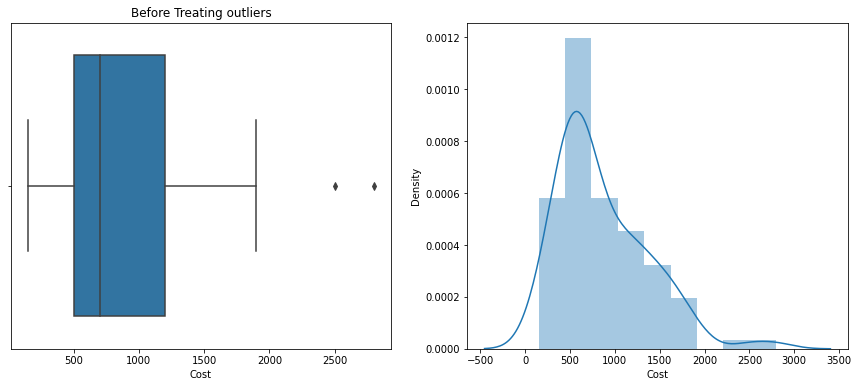

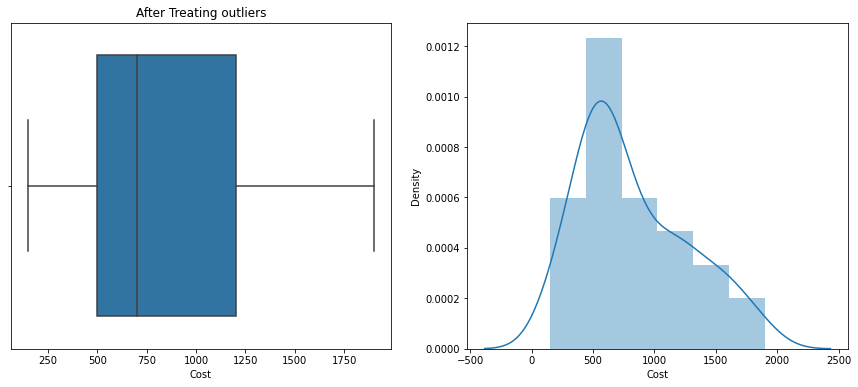

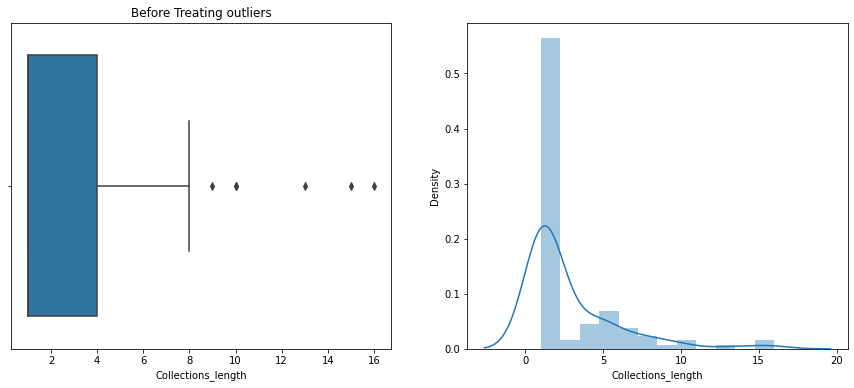

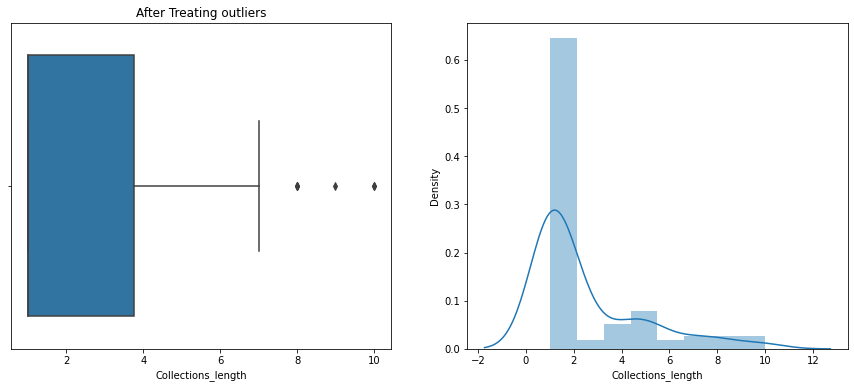

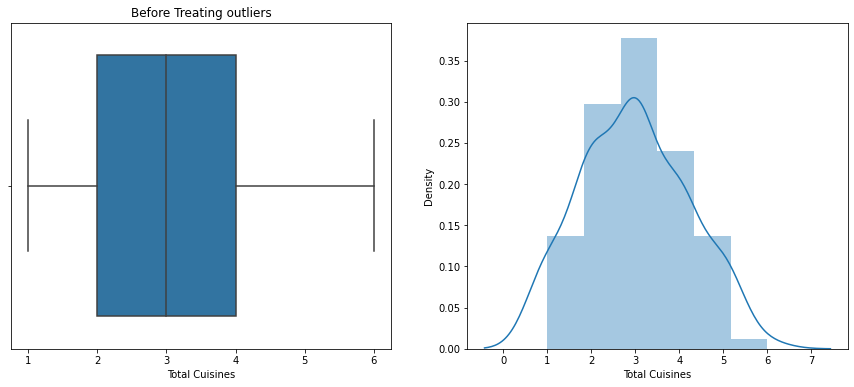

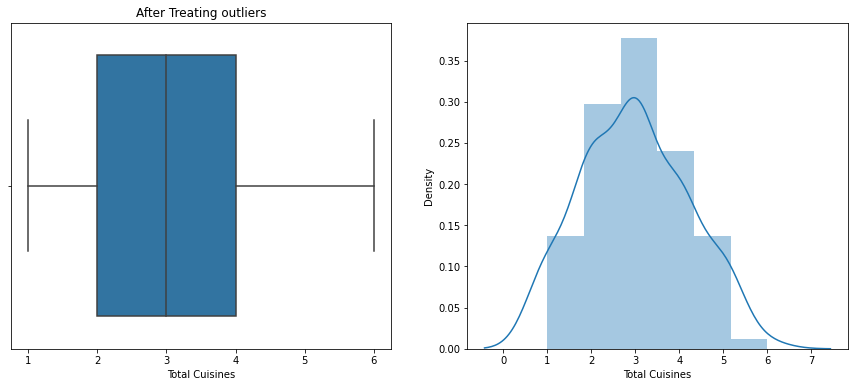

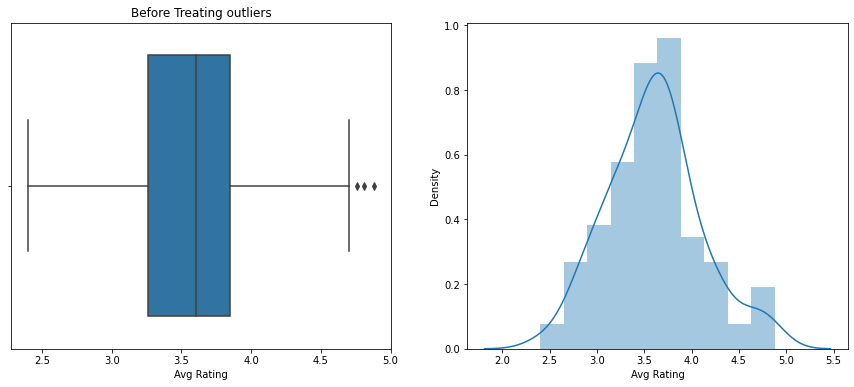

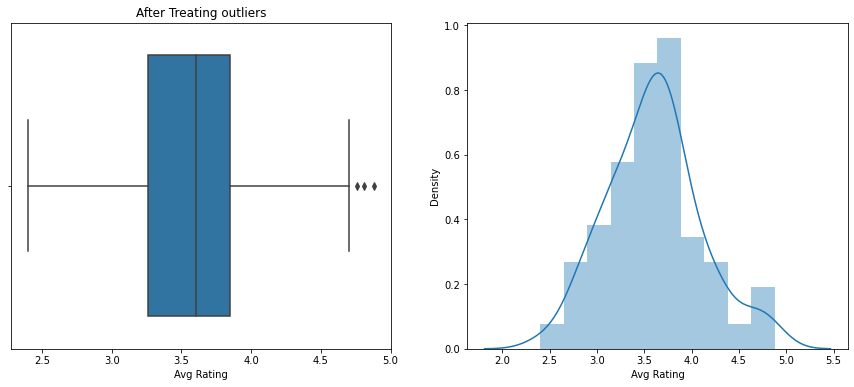

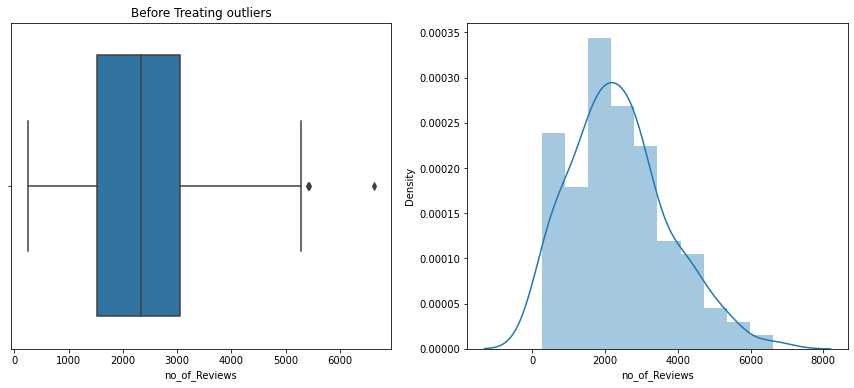

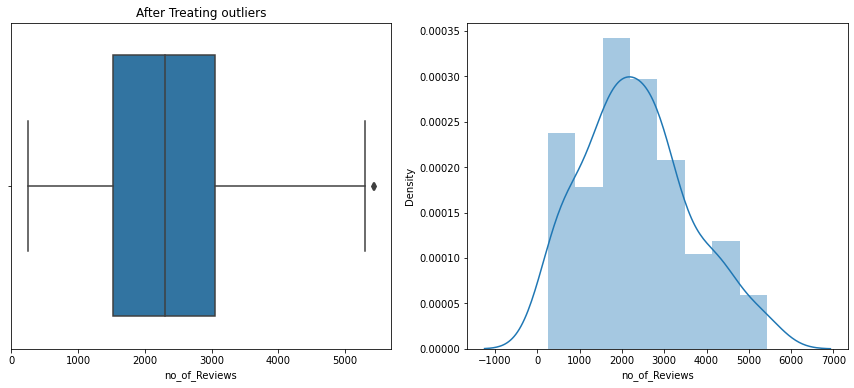

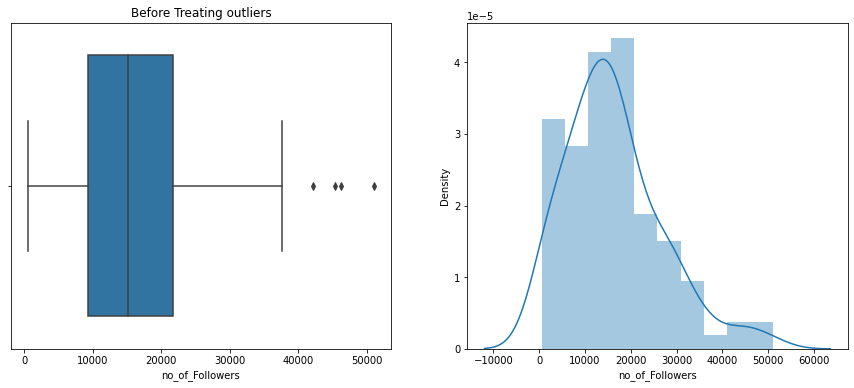

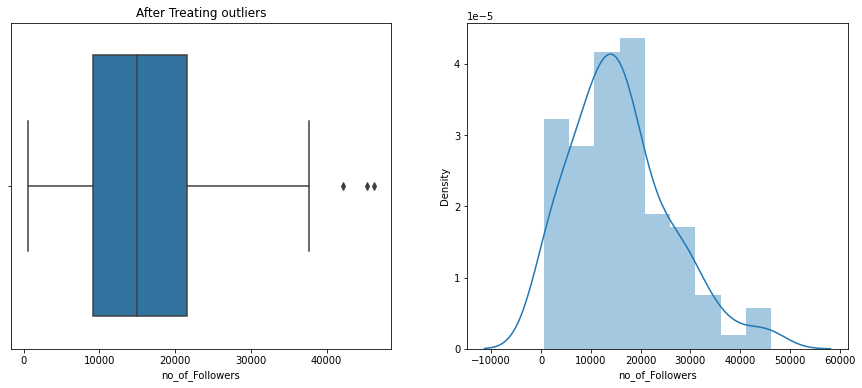

In [106]:
for i in numeric_DF.columns:
  remove_outlier(numeric_DF,i)

In [107]:
numeric_DF.head()

Cost  Collections_length  Total Cuisines  Avg Rating  no_of_Reviews  \
0  2800.0                   2               5       3.410         4764.0   
1  2500.0                   8               4       4.220         2341.0   
2  1900.0                   2               3       3.800         3990.0   
3  1900.0                   4               5       3.535         2927.0   
4  1800.0                   1               4       4.260         4444.0   

   no_of_Followers  
0          17826.0  
1          17595.0  
2          24573.0  
3          26995.0  
4          31644.0

The final dataframe so obtained.

##**2. One hot encding**



In [108]:
numeric_DF = pd.concat([numeric_DF,pd.DataFrame(columns=list(diff_cuisines.keys()))])

In [109]:
numeric_DF.head(2)

Cost  Collections_length  Total Cuisines  Avg Rating  no_of_Reviews  \
0  2800.0                 2.0             5.0        3.41         4764.0   
1  2500.0                 8.0             4.0        4.22         2341.0   

   no_of_Followers Chinese Continental Kebab European  ... Spanish Wraps Thai  \
0          17826.0     NaN         NaN   NaN      NaN  ...     NaN   NaN  NaN   
1          17595.0     NaN         NaN   NaN      NaN  ...     NaN   NaN  NaN   

  Indonesian Modern Indian Momos Pizza North Eastern Mithai Malaysian  
0        NaN           NaN   NaN   NaN           NaN    NaN       NaN  
1        NaN           NaN   NaN   NaN           NaN    NaN       NaN  

[2 rows x 50 columns]

In [110]:
# iterating for every row in the dataframe
for i, row in numeric_DF.iterrows():
  # and for every row we iterate over the new columns only
  for column in list(numeric_DF.columns):
      if column not in ['Cost','Collections_length','Total Cuisines','Avg Rating','no_of_Reviews','no_of_Followers']:
        # and check if the column is in the list of cuisines available for that row
        if column in text_DF['Cuisines']:
          #then assign it as 1 else 0
          numeric_DF.loc[i,column] = 1
        else:
          numeric_DF.loc[i,column] = 0

In [111]:
numeric_DF.head(2)

Cost  Collections_length  Total Cuisines  Avg Rating  no_of_Reviews  \
0  2800.0                 2.0             5.0        3.41         4764.0   
1  2500.0                 8.0             4.0        4.22         2341.0   

   no_of_Followers Chinese Continental Kebab European  ... Spanish Wraps Thai  \
0          17826.0       0           0     0        0  ...       0     0    0   
1          17595.0       0           0     0        0  ...       0     0    0   

  Indonesian Modern Indian Momos Pizza North Eastern Mithai Malaysian  
0          0             0     0     0             0      0         0  
1          0             0     0     0             0      0         0  

[2 rows x 50 columns]

We have performed one hot encoding for the 'Cuisines' categorical column.

##**3. Feature Scaling**

In [112]:
#Min max scaler for only numeric columns


column_names = list(numeric_DF.columns)
# column_names

#taking columns to do the minmaxscaling
DF_scaled = pd.DataFrame()
#using standardization as both numeric columns are in different scale

scaler = MinMaxScaler()
scaled = scaler.fit_transform(numeric_DF)
#print(scaled)
DF_scaled = pd.DataFrame(scaler.fit_transform(numeric_DF))
DF_scaled.columns = column_names

In [113]:
DF_scaled.head()

Cost  Collections_length  Total Cuisines  Avg Rating  no_of_Reviews  \
0  1.000000            0.066667             0.8    0.407258       0.707654   
1  0.886792            0.466667             0.6    0.733871       0.327635   
2  0.660377            0.066667             0.4    0.564516       0.586261   
3  0.660377            0.200000             0.8    0.457661       0.419542   
4  0.622642            0.000000             0.6    0.750000       0.657465   

   no_of_Followers  Chinese  Continental  Kebab  European  ...  Spanish  \
0         0.341821      0.0          0.0    0.0       0.0  ...      0.0   
1         0.337247      0.0          0.0    0.0       0.0  ...      0.0   
2         0.475409      0.0          0.0    0.0       0.0  ...      0.0   
3         0.523364      0.0          0.0    0.0       0.0  ...      0.0   
4         0.615412      0.0          0.0    0.0       0.0  ...      0.0   

   Wraps  Thai  Indonesian  Modern Indian  Momos  Pizza  North Eastern  \
0    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
1    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
2    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
3    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
4    0.0   0.0         0.0            0.0    0.0    0.0            0.0   

   Mithai  Malaysian  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0  

[5 rows x 50 columns]

Above is the final dataframe which is ready for clustering.

In [114]:
Df = DF_scaled.copy()

#**X. Clustering**

Cluster analysis, or clustering, is an unsupervised machine learning task. Similarity between observations is defined using some inter-observation distance measures or correlation-based distance measures.

It involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling), clustering algorithms only interpret the input data and find natural groups or clusters in feature space.


Cluster analysis is an iterative process where subjective evaluation of the identified clusters is fed back into changes to algorithm configuration until a desired or appropriate result is achieved.

Many algorithms use similarity or distance measures between examples in the feature space in an effort to discover dense regions of observations.

##**1. Affinity propagation**

Affinity Propagation involves finding a set of exemplars that best summarize the data.

It takes as input measures of similarity between pairs of data points. 
Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges.

It is implemented via the AffinityPropagation class and the main configuration to tune is the “damping” set between 0.5 and 1, and perhaps “preference.”

In [115]:
new_df = DF_scaled.copy()
new_df.pop('Cost')
new_df.insert(3,'Cost',DF_scaled['Cost'])

In [116]:
new_df.head(5)

Collections_length  Total Cuisines  Avg Rating      Cost  no_of_Reviews  \
0            0.066667             0.8    0.407258  1.000000       0.707654   
1            0.466667             0.6    0.733871  0.886792       0.327635   
2            0.066667             0.4    0.564516  0.660377       0.586261   
3            0.200000             0.8    0.457661  0.660377       0.419542   
4            0.000000             0.6    0.750000  0.622642       0.657465   

   no_of_Followers  Chinese  Continental  Kebab  European  ...  Spanish  \
0         0.341821      0.0          0.0    0.0       0.0  ...      0.0   
1         0.337247      0.0          0.0    0.0       0.0  ...      0.0   
2         0.475409      0.0          0.0    0.0       0.0  ...      0.0   
3         0.523364      0.0          0.0    0.0       0.0  ...      0.0   
4         0.615412      0.0          0.0    0.0       0.0  ...      0.0   

   Wraps  Thai  Indonesian  Modern Indian  Momos  Pizza  North Eastern  \
0    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
1    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
2    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
3    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
4    0.0   0.0         0.0            0.0    0.0    0.0            0.0   

   Mithai  Malaysian  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0  

[5 rows x 50 columns]

In [117]:
DF_scaled = new_df.copy()

In [118]:
#Dataframe for Silhouette score
Y_predicted_clusters = DF_scaled.copy()
silhouette_scores_df = pd.DataFrame(columns = ['Model','Optimal_clusters','Silhouette_score'])

In [119]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AffinityPropagation

for i in range(4,0,-1):
  features = DF_scaled.columns[:-i]
  #print(features)
  X = DF_scaled[features]
  # define the model
  model = AffinityPropagation(damping=0.9)
  # fit the model
  model.fit(X)
  # assign a cluster to each example
  yhat = model.predict(X)
  clusters = unique(yhat)
  score = silhouette_score(X, yhat)
  #print(score,clusters)
  #Y_predicted_clusters["Label_AffPr"] = yhat


In [120]:
X = DF_scaled[['Collections_length','Total Cuisines']]
# affinity propagation clustering


# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
score = silhouette_score(X, yhat)
clusters = unique(yhat)


# silhouette_scores_df.loc[0] = ['Affinity Propagation',len(clusters),score]
Y_predicted_clusters["Label_AffPr"] = yhat

dict_values = {'Model':'Affinity Propagation','Optimal_clusters':len(clusters),'Silhouette_score':score}
silhouette_scores_df = silhouette_scores_df.append(dict_values,ignore_index=True)


Text(0.5, 1.0, 'Total collections vs total no of cuisines')

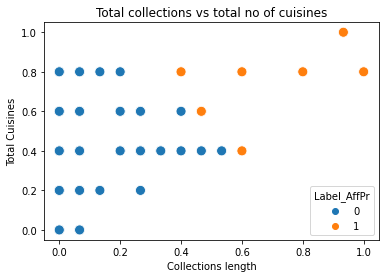

In [121]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',hue="Label_AffPr", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

In [122]:
silhouette_scores_df

Model Optimal_clusters  Silhouette_score
0  Affinity Propagation                2          0.528113

##**2. Hierarchial Clustering**

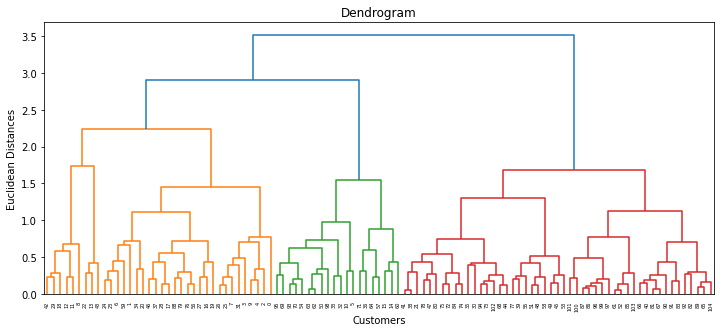

In [123]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(DF_scaled, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line

###**Agglomerative Hierarchial Clustering**

Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

It is a part of a broader class of hierarchical clustering methods 

It is implemented via the AgglomerativeClustering class and the main configuration to tune is the “n_clusters” set, an estimate of the number of clusters in the data

In [128]:
X = DF_scaled[['Collections_length','Total Cuisines']]

In [129]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
    score = silhouette_score(X, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4335107828303377
For n_clusters = 3, silhouette score is 0.48802339205161466
For n_clusters = 4, silhouette score is 0.5179964416226097
For n_clusters = 5, silhouette score is 0.5445312108726558
For n_clusters = 6, silhouette score is 0.5752795554964288
For n_clusters = 7, silhouette score is 0.6655277612619891
For n_clusters = 8, silhouette score is 0.7117623586975316
For n_clusters = 9, silhouette score is 0.7277697386377214
For n_clusters = 10, silhouette score is 0.7536748193816458
For n_clusters = 11, silhouette score is 0.7605675569175306
For n_clusters = 12, silhouette score is 0.7610761573409515
For n_clusters = 13, silhouette score is 0.7659263114121728
For n_clusters = 14, silhouette score is 0.7654432060908319
For n_clusters = 15, silhouette score is 0.7543464632722238


In [130]:
n_clusters = 7

#fit predict kmeans on  clusters
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
score = silhouette_score(X, y_hc)

Y_predicted_clusters["Label_AggClu"] = y_hc

silhouette_scores_df.loc[1] = ['Agglomerative Clustering',n_clusters,score]


Text(0.5, 1.0, 'Total collections vs total no of cuisines')

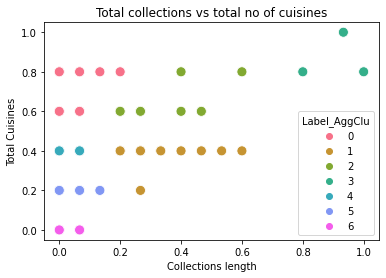

In [131]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',palette = sns.color_palette("husl",7),hue="Label_AggClu", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

##**3. dbscan clustering**

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

It is implemented via the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

In [132]:

# dbscan clustering

from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps=0.15, min_samples=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
score = silhouette_score(X, yhat)
#print(score)
Y_predicted_clusters["Label_DBscan"] = yhat
silhouette_scores_df.loc[2] = ['DBscan Clustering',len(clusters),score]



Text(0.5, 1.0, 'Total collections vs total no of cuisines')

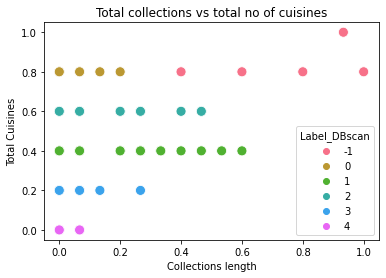

In [133]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',palette = sns.color_palette("husl",len(clusters)),hue="Label_DBscan", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

## **4. K Means Clustering**

K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

It is implemented via the KMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

In [134]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing

#We are considering oly 2 features which are giving good results.
features_cluster=['Collections_length','Total Cuisines']
X = DF_scaled[features_cluster]

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.46900443422593047
For n_clusters = 3, silhouette score is 0.5018710810584983
For n_clusters = 4, silhouette score is 0.5223454978466936
For n_clusters = 5, silhouette score is 0.5464420893642346
For n_clusters = 6, silhouette score is 0.6255229585135863
For n_clusters = 7, silhouette score is 0.64965057905248
For n_clusters = 8, silhouette score is 0.7178809299376797
For n_clusters = 9, silhouette score is 0.7361509823447424
For n_clusters = 10, silhouette score is 0.7557527587992677
For n_clusters = 11, silhouette score is 0.7619357458705309
For n_clusters = 12, silhouette score is 0.7667858999417521
For n_clusters = 13, silhouette score is 0.7860981719880429
For n_clusters = 14, silhouette score is 0.7569175184127711
For n_clusters = 15, silhouette score is 0.7770884769187085


###**Elbow method**

In [135]:
#Within Cluster Sum of Squared Errors for different values of k
#let's first take two variables only 
wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

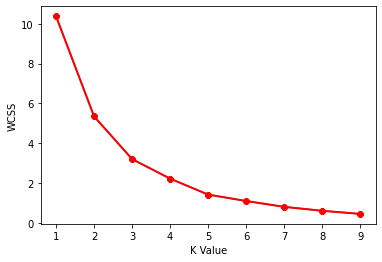

In [136]:
#The elbow curve
plt.plot(range(1,10),wcss)
plt.plot(range(1,10),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,10,1))
plt.ylabel("WCSS")

In [137]:
n_clusters = 7

#fit predict kmeans on  clusters
model1 = KMeans(n_clusters=7,random_state= 42)
pred_1 = model1.fit_predict(X)
score = silhouette_score(X, pred_1)

Y_predicted_clusters["Label_Kmeans"] = pred_1

silhouette_scores_df.loc[3] = ['KMeans Clustering',len(clusters),score]


In [138]:
silhouette_scores_df.head()

Model Optimal_clusters  Silhouette_score
0      Affinity Propagation                2          0.528113
1  Agglomerative Clustering                7          0.665528
2         DBscan Clustering                6          0.519814
3         KMeans Clustering                6          0.665913

Text(0.5, 1.0, 'Total collections vs total no of cuisines')

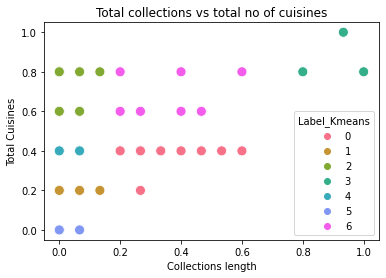

In [139]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',palette = sns.color_palette("husl",7),hue="Label_Kmeans", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

##**5. mini-batch k-means**

Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

It is implemented via the MiniBatchKMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

In [140]:

# mini-batch k-means clustering

from sklearn.cluster import MiniBatchKMeans

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    model = MiniBatchKMeans(n_clusters=n_clusters)
    yhat = model.fit_predict(X)
    #clusters = unique(yhat)
    score = silhouette_score(X, yhat)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4404736865209299
For n_clusters = 3, silhouette score is 0.4728221013881035
For n_clusters = 4, silhouette score is 0.5109001288828109
For n_clusters = 5, silhouette score is 0.5464420893642346
For n_clusters = 6, silhouette score is 0.6255229585135863
For n_clusters = 7, silhouette score is 0.647718267967151
For n_clusters = 8, silhouette score is 0.6143393221655727
For n_clusters = 9, silhouette score is 0.7302715217076453
For n_clusters = 10, silhouette score is 0.7447140839266826
For n_clusters = 11, silhouette score is 0.7742519311328729
For n_clusters = 12, silhouette score is 0.7741763512312083
For n_clusters = 13, silhouette score is 0.7917692995709937
For n_clusters = 14, silhouette score is 0.7683232587179921
For n_clusters = 15, silhouette score is 0.7910895448424677


In [141]:
n_clusters = 7
# mini batch kmeans clustering

from sklearn.cluster import DBSCAN

# define the model
model = MiniBatchKMeans(n_clusters=n_clusters)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
score = silhouette_score(X, yhat)
#print(score)
Y_predicted_clusters["Label_minik"] = yhat
silhouette_scores_df.loc[4] = ['mini batch k means',n_clusters,score]



Text(0.5, 1.0, 'Total collections vs total no of cuisines')

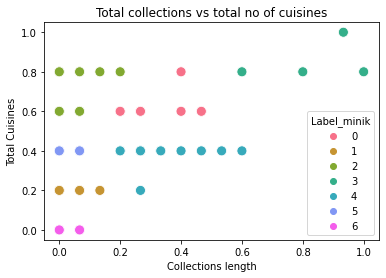

In [142]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',palette = sns.color_palette("husl",7),hue="Label_minik", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

##**6. Validation**


A variety of measures have been proposed in the literature for evaluating clustering results. The term clustering validation is used to design the procedure of evaluating the results of a clustering algorithm.

**Silhouette score -**

Average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k.

In [143]:
silhouette_scores_df.sort_values('Silhouette_score',ascending=False)

Model Optimal_clusters  Silhouette_score
4        mini batch k means                7          0.669094
3         KMeans Clustering                6          0.665913
1  Agglomerative Clustering                7          0.665528
0      Affinity Propagation                2          0.528113
2         DBscan Clustering                6          0.519814

Through this dataframe, we can conclude that the optimal number of clusters are 7 (or 6). Except the affinity propagation, all other models are giving the optimal clusters as 7(or 6).

#**XI. Sentimental analysis**

##**1. Loading the data**

In [144]:
reviews_df.head(3)

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   

                                              Review  Rating  Pictures  \
0  The ambience was good, food was quite good . h...     5.0         0   
1  Ambience is too good for a pleasant evening. S...     5.0         0   
2  A must try.. great food great ambience. Thnx f...     5.0         0   

   no_of_Reviews  no_of_Followers        Date  Hour       day month  year  
0            1.0              2.0  2019-05-25    15  Saturday   May  2019  
1            3.0              2.0  2019-05-25    14  Saturday   May  2019  
2            2.0              3.0  2019-05-24    22    Friday   May  2019

In [145]:
# Considering only those columns whihc are needed for the analysis
sentiment_df = reviews_df[['Review','Rating']]

In [146]:
# Null values
sentiment_df.isna().sum()

Review    0
Rating    0
dtype: int64

In [147]:
#Looking at the random review to get to know the type of strings involved in comments
sentiment_df['Review'][78]
#As we can see there are some emojis present in here.
#We have to well perform the data preprocessing berfore starting with the Sentiment analysis


'Ambience is good and staff are polite and friendly. Food is super good and had nice time having lunch .... keep up the good work. Thank you for your nice hospitality. Loved it 💕 💕 💕'

In [148]:
sentiment_df['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [149]:
sentiment_df.shape

(9954, 2)

##**2. Text preprocessing**

We have to remove

(1) Punctuations

(2) multiple spaces

(3) Emojis

(4) Numbers and ratings specified within the review

(5) \n present in review

(6) stop words and special characters

(7) need to use lemmatization

In [150]:
# converting the statements in reviews to lower alphabets
sentiment_df['Review'] = sentiment_df['Review'].str.lower()
sentiment_df.head(3)

Review  Rating
0  the ambience was good, food was quite good . h...     5.0
1  ambience is too good for a pleasant evening. s...     5.0
2  a must try.. great food great ambience. thnx f...     5.0

In [151]:
# cleaning the dataset by removing the punctuations and all
import re
import string

#To remove emoji
def remove_Emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#to remove ratings along with \n
def remove_rating(rating):
  rating=re.sub(r'([0.-9.]+/+[0.-9.]+)','',rating) #using regx
  rating=re.sub(r'(\n+)','',rating) #removes \n
  return rating

#to remove numbers 
def remove_number(x):
  output = re.sub(r'\d+[a-zA-Z0-9_.+-]+', '',x)
  output = re.sub(r'[a-zA-Z0-9_.+-]+\d', '',output)
  output = re.sub(r'\d+', '',output)
  return output

#to remove punctuations and special characters
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return nopunc


#to remove [] brackets ''' quotes 
def clean_text(text):
    '''remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'[''""...]', '', text)
    return text


#to remove stop words
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:' '.join([i for i in x.split() if i not in sw_spacy]))


#to remove multiple spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:remove_Emoji(x))
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:remove_rating(x))
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:remove_number(x))
sentiment_df['Review'] = sentiment_df['Review'].apply(text_process)
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:clean_text(x) )


In [152]:
#Convert short forms

In [153]:
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 5.2 MB/s 
     |████████████████████████████████| 287 kB 37.9 MB/s 


In [154]:
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

In [155]:
#Converting word to its root form

In [156]:
#download small spacy model
import spacy

!python -m spacy download en_core_web_sm
spacy.load('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-27 16:02:50.684472: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 2.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [157]:
#Lemmatization
def lemmatization_(sentence):
    doc = nlp(sentence)
    l=list()
    for word in doc:
        
        l.append(word.lemma_)

    return ' '.join(l)

sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:lemmatization_(x))

In [158]:
#to remove rarely used words

In [159]:
#Rarely used words and word count
word=' '.join(sentiment_df['Review']).split()
words_df = pd.Series(word)

In [160]:
words_df


0         ambience
1             good
2             food
3             good
4         saturday
            ...   
258128       price
258129       value
258130       money
258131        fine
258132    ambience
Length: 258133, dtype: object

In [161]:
sentiment_df['Review'][1]

'ambience good pleasant evening service prompt food good good experience souman das   kudo service'

In [162]:
top_10_words = words_df.value_counts()[0:10]
least_10_words = words_df.value_counts(ascending=True)[0:10]

In [163]:
least_10_words

uch            1
shewzwan       1
hinder         1
monis          1
inexpensive    1
chilkur        1
balaji         1
chefwe         1
succha         1
wetmust        1
dtype: int64

In [164]:
#Removing words which are rarely used 
def remove_rarely_used_words(review):
  review=" ".join([i for i in review.split() if len(i)>3])
  return review

sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:remove_rarely_used_words(x))

In [165]:
df = sentiment_df.copy()

In [166]:
df.head(3)

Review  Rating
0  ambience good food good saturday lunch cost ef...     5.0
1  ambience good pleasant evening service prompt ...     5.0
2  great food great ambience thnx service pradeep...     5.0

##**3. Feature engineering**

In [172]:
#Creating 2 categories based on the rating 
def sentiment(rating):
  if rating >=3.5:
    return 1 
    # positive statement
  else:
    return 0
    # negative

In [173]:
df['sentiment']=df['Rating'].apply(lambda x:sentiment(x))
df.head(5)

Review  Rating  sentiment
0  ambience good food good saturday lunch cost ef...     5.0          1
1  ambience good pleasant evening service prompt ...     5.0          1
2  great food great ambience thnx service pradeep...     5.0          1
3  soumen arun great behavior sincerety good food...     5.0          1
4  food goodwe order kodi drumstick basket mutton...     5.0          1

In [174]:
# creating x and y varibles for independent and dependent variable
X = df['Review']
y = df['sentiment']

The data is all set for further analysis. We now start with building models.

##**4. Train and test split**

In [175]:
# spliting the data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [176]:
# creating topkens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

##**5. Models**

###**(i). Building Models**

In [177]:
#Importing all the libraries needed
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

In [178]:
# Creating class for all models 
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
svm = SVC(random_state=6)
lgr = LogisticRegression(solver='liblinear')
mnb =  MultinomialNB()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [179]:
models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Logistic Regression" : lgr,
          "XGboost" : xgb,
          'Multinomial NB' : mnb,
          'LGBM' : lgbm}
scores= { }

In [180]:
#Fitting the models
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [181]:
#Creating a datafframe which holds the accuracy score for all models
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

Accuracy Score
SVM                        0.852551
Logistic Regression        0.852551
LGBM                       0.846926
Random forest              0.837284
XGboost                    0.811571
Multinomial NB             0.783447
Decision tree              0.762957
KNN                        0.723584

We can observe that SVM, Logistic regression, Random forest and LGBM are giving good accuracy score.

###**(ii). Evaluation - ROC curve**

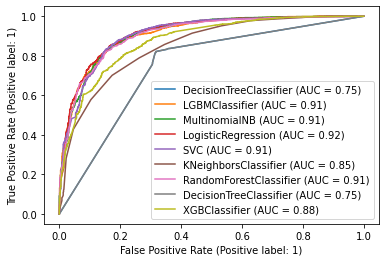

In [182]:
#ROC curve
from sklearn.metrics import plot_roc_curve,classification_report

disp = plot_roc_curve(dtc, X_test, y_test)
plt.rcParams['figure.figsize'] = (16, 10)
plot_roc_curve(lgbm,X_test, y_test, ax = disp.ax_)
plot_roc_curve(mnb,X_test, y_test, ax = disp.ax_)
plot_roc_curve(lgr,X_test, y_test, ax = disp.ax_)
plot_roc_curve(svm,X_test, y_test, ax = disp.ax_)
plot_roc_curve(knn,X_test, y_test, ax = disp.ax_)
plot_roc_curve(ran,X_test, y_test, ax = disp.ax_) 
plot_roc_curve(dtc,X_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb,X_test, y_test, ax = disp.ax_)

According to ROC curve, LGBM, Multinomial NB and Logistic regression are performing good.

###**(iii). Evaluation metric - Accuracy, Recall and f1-score**

In [183]:
models = [['XGboost', XGBClassifier()],
          ['Decision tree', DecisionTreeClassifier()],
          ['KNN', KNeighborsClassifier(n_neighbors=79)],
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['LGBM', lgb.LGBMClassifier()],
          ['Random forest', RandomForestClassifier(n_estimators=90)],
          ['SVM', SVC(random_state=6)],
          ['Multinomial NB' , MultinomialNB()]
          ]

In [184]:
#Creating a dataframe which holds all details of evaluation metric
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

In [185]:
model_1_data = pd.DataFrame(model_1_data)
model_1_data.drop('Precision',axis=1,inplace=True)
model_1_data

Name  Train_accuracy  Test_accuracy    Recall  F1_Score
0              XGboost        0.838312       0.811571  0.777116  0.735477
1        Decision tree        0.988212       0.763359  0.701754  0.670766
2                  KNN        0.741728       0.724387  0.930556  0.438625
3  Logistic Regression        0.903014       0.852551  0.855709  0.787984
4                 LGBM        0.926725       0.846926  0.815279  0.789619
5        Random forest        0.988212       0.838489  0.872549  0.756068
6                  SVM        0.969190       0.852551  0.870588  0.783991
7       Multinomial NB        0.843670       0.783447  0.958237  0.605128

Here in sentimental analysis, we consider the scores of accuracy along with recall and f1 score. We don't focus on precision, as our main aim is to check for how accurate is our predictions and how correctly our model is able predict the true positives(recall).


###**(iv). Models to choose for Hyper-parameter tuning**

In [186]:
classifiers = [XGBClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=79),LogisticRegression(solver='liblinear'),lgb.LGBMClassifier(),
               RandomForestClassifier(n_estimators=90),SVC(random_state=6),MultinomialNB()]
classifiers_names = ['XGboost','Decision tree','KNN','Logistic Regression','LGBM','Random Forest','SVM','Multinomial NB']
training,testing = [],[]
for i in classifiers:
    i.fit(X_train, y_train)
    train_y_predicted = i.predict(X_train)
    test_y_predicted = i.predict(X_test)
    tr = round(accuracy_score(y_train,train_y_predicted),4)
    ts = round(accuracy_score(y_test,test_y_predicted),4)
    training.append(tr)
    testing.append(ts)

In [187]:
diff = np.array(training)-np.array(testing)

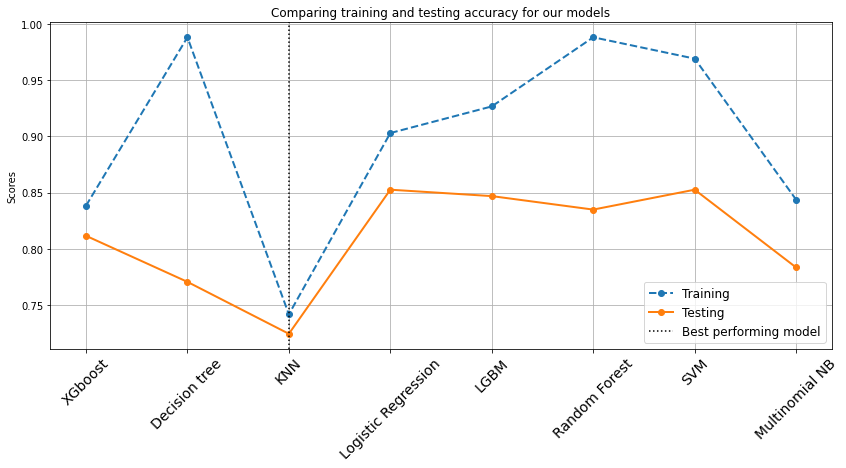

In [188]:
plt.figure(figsize=(14,6))
plt.plot(range(0,len(classifiers)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(classifiers)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(classifiers)), classifiers_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing accuracy for our models")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

We can see that our models are quite overfitting. But if we consider those models with less overfitting and more than 80% accuracy then it would be 

(1)XGboost

(2) Logistic regression

(3) LGBM and

(4) SVM

Now we do the hyperparameter tuning for these models and we choose the best amongst these.

##**6. Hyper-parameter tuning**

###**( a ) Hyperparameter Tuning for all models**

####**1. Hyper parameter tuning - Logistic Regression**

In [189]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid_lgr = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid_lgr, cv = 5)
  
logreg_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.849430676490288


In [190]:
logreg_pred = logreg_cv.predict(X_test)
print(classification_report(y_test,logreg_pred,digits=4))


              precision    recall  f1-score   support

           0     0.8388    0.7355    0.7838       934
           1     0.8521    0.9151    0.8825      1555

    accuracy                         0.8477      2489
   macro avg     0.8455    0.8253    0.8331      2489
weighted avg     0.8471    0.8477    0.8455      2489



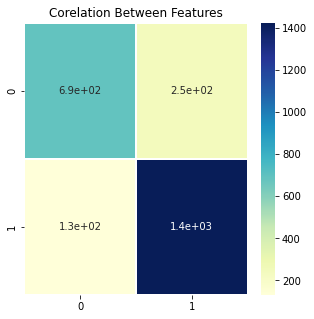

In [191]:
conf_mat = confusion_matrix(y_test, logreg_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

####**2. Hyperparameter tuning for XGboost**

In [192]:
xgbc = XGBClassifier()

from sklearn.model_selection import GridSearchCV
  
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
  
# Instantiating Decision Tree classifier
xgb_cv=GridSearchCV(estimator=xgbc,param_grid=xgb_param,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)
    
xgb_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

#Finding the best fit
xgb_cv.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}
Best score is 0.8364372370261951


XGBClassifier(criterion='entropy', max_depth=15, n_estimators=150)

In [193]:
xgb_pred = xgb_cv.predict(X_test)
print(classification_report(y_test,xgb_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8135    0.7473    0.7790       934
           1     0.8553    0.8971    0.8757      1555

    accuracy                         0.8409      2489
   macro avg     0.8344    0.8222    0.8274      2489
weighted avg     0.8396    0.8409    0.8394      2489



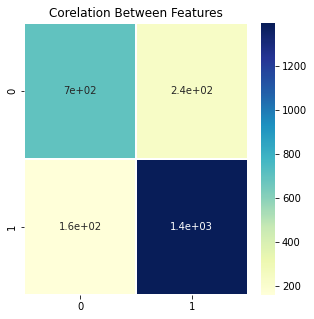

In [194]:
conf_mat = confusion_matrix(y_test, xgb_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

####**3. Hyper parameter tuning for Multinomial NB**

In [195]:
mnb = MultinomialNB()

# grid_params = {'alpha':[1.0], 'class_prior': [True], 'fit_prior': [None] }
grid_params = {'alpha':[1.0,1e-1,1e-2]}
from sklearn.metrics import classification_report

mnb_cv = GridSearchCV(mnb, grid_params, cv=10, scoring='accuracy')

# from sklearn.preprocessing import PowerTransformer
# Data_transformed = PowerTransformer().fit_transform(X_test)
# # mnb_cv.fit(Data_transformed, y_test)
mnb_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(mnb_cv.best_params_))
print("Best score is {}".format(mnb_cv.best_score_))

#Finding the best fit
mnb_cv.best_estimator_

Tuned Decision Tree Parameters: {'alpha': 0.1}
Best score is 0.8309446902893074


MultinomialNB(alpha=0.1)

In [196]:
mnb_pred = mnb_cv.predict(X_test)
print(classification_report(y_test,mnb_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8826    0.6199    0.7283       934
           1     0.8063    0.9505    0.8725      1555

    accuracy                         0.8264      2489
   macro avg     0.8445    0.7852    0.8004      2489
weighted avg     0.8350    0.8264    0.8184      2489



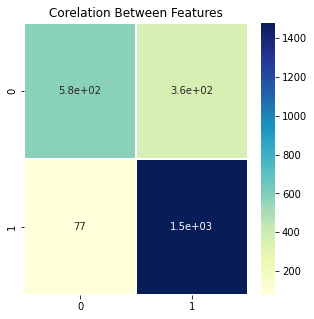

In [197]:
conf_mat = confusion_matrix(y_test, mnb_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

####**4. LGBM Hyperparameter tuning**

In [198]:
lgbc = lgb.LGBMClassifier()

from sklearn.model_selection import GridSearchCV
  
# finding the best parameters for XGBRegressor by gridsearchcv
lgbm_para={'n_estimators': [100,125,150],'max_depth': [15,20,25]}
  
# Instantiating Decision Tree classifier
lgbm_cv = GridSearchCV(estimator=lgbc ,param_grid=lgbm_para,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)
    
lgbm_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(lgbm_cv.best_params_))
print("Best score is {}".format(lgbm_cv.best_score_))

#Finding the best fit
lgbm_cv.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Tuned Decision Tree Parameters: {'max_depth': 20, 'n_estimators': 100}
Best score is 0.8395180487607422


LGBMClassifier(max_depth=20)

In [199]:
lgbm_pred = lgbm_cv.predict(X_test)
print(classification_report(y_test,lgbm_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8085    0.7505    0.7785       934
           1     0.8564    0.8932    0.8744      1555

    accuracy                         0.8397      2489
   macro avg     0.8324    0.8219    0.8264      2489
weighted avg     0.8384    0.8397    0.8384      2489



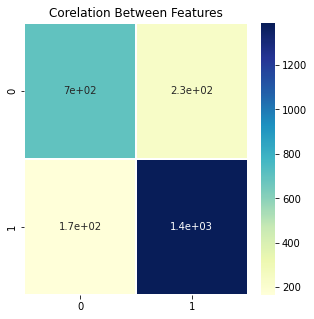

In [200]:
conf_mat = confusion_matrix(y_test, lgbm_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

###**(b). Evaluation Metric - Accuracy, recall and f1 score**

In [201]:
models = [
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['Logistic Regression after Hyperparameter Tuning',GridSearchCV(logreg, param_grid_lgr, cv = 5)],
          ['XGboost', XGBClassifier()],
          ['XGboost after Hyperparameter tuning',GridSearchCV(estimator=xgbc,param_grid=xgb_param,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)],
          ['LGBM', lgb.LGBMClassifier()],
          ['LGBM ater Hyperparameter tuning',GridSearchCV(estimator=lgbc ,param_grid=lgbm_para,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)],
          ["Multinomial",MultinomialNB()],
          ['Multinomial after Hyperparameter tuning',GridSearchCV(mnb, grid_params, cv=10, scoring='accuracy')]
         ]

In [202]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [203]:
model_1_data = pd.DataFrame(model_1_data)
model_1_data.drop('Precision',axis=1,inplace=True)
model_1_data

Name  Train_accuracy  \
0                              Logistic Regression        0.903014   
1  Logistic Regression after Hyperparameter Tuning        0.935298   
2                                          XGboost        0.838312   
3              XGboost after Hyperparameter tuning        0.954856   
4                                             LGBM        0.926725   
5                  LGBM ater Hyperparameter tuning        0.923108   
6                                      Multinomial        0.843670   
7          Multinomial after Hyperparameter tuning        0.917749   

   Test_accuracy    Recall  F1_Score  
0       0.852551  0.855709  0.787984  
1       0.847730  0.838828  0.783799  
2       0.811571  0.777116  0.735477  
3       0.840900  0.813520  0.779018  
4       0.846926  0.815279  0.789619  
5       0.839695  0.808535  0.778456  
6       0.783447  0.958237  0.605128  
7       0.826436  0.882622  0.728302

After the hyperparameter tuning, we can't see much of a change in accuracy or recall. Some models like xgboost are overfitting after hyper-parameter tuning.We can say its been tuned to its perfect fit.

###**(c). Conclusion after hyper parameter tuning**

In [204]:
classifiers = [KNeighborsClassifier(n_neighbors=5), GridSearchCV(logreg, param_grid_lgr, cv = 5),
               GridSearchCV(estimator=xgbc,param_grid=xgb_param,cv=3,scoring='accuracy',verbose=5,n_jobs=-1),
               GridSearchCV(estimator=lgbc ,param_grid=lgbm_para,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)
              ]
classifiers_names = ['KNN','Logistic Regression','XGboost','LGBM']
training,testing = [],[]
for i in classifiers:
    i.fit(X_train, y_train)
    train_y_predicted = i.predict(X_train)
    test_y_predicted = i.predict(X_test)
    tr = round(accuracy_score(y_train,train_y_predicted),4)
    ts = round(accuracy_score(y_test,test_y_predicted),4)
    training.append(tr)
    testing.append(ts)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


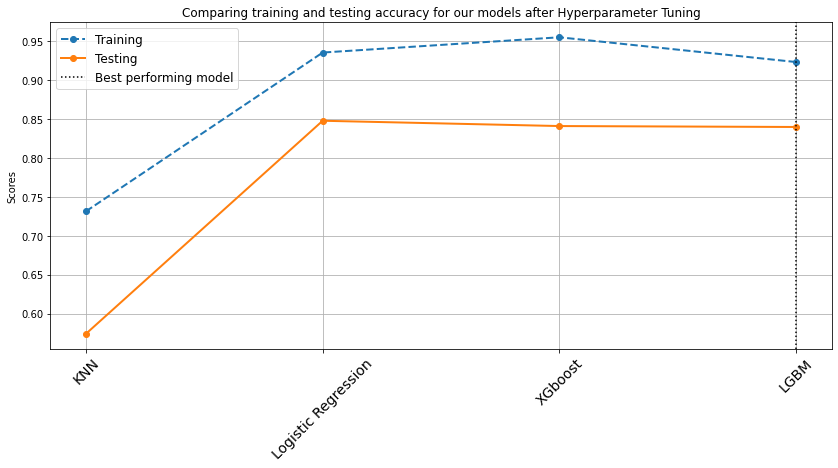

In [205]:
diff = np.array(training)-np.array(testing)

plt.figure(figsize=(14,6))
plt.plot(range(0,len(classifiers)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(classifiers)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(classifiers)), classifiers_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing accuracy for our models after Hyperparameter Tuning")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

We can observe that Logistic regression is working good. Its accuracy and recall is more when compared to other models.
So we conclude that that Logistic regression is the best model in this sentimental analysis.